In [51]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_new.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_new.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  moving_x  moving_y  \
0             0.0    Kento MOMOTA     1.0  發短球  ...  0.012041  0.262869   
1             0.0  CHOU Tien Chen     3.0   長球  ... -0.073337  0.594564   
2             0.0    Kento MOMOTA     1.0  發短球  ...  0.011994  0.275664   
3             0.0  CHOU Tien Chen     2.0  推撲球  ... -0.058087  0.142593   
4             0.0    Kento MOMOTA     2.0   殺球  ...  0.158490 -0.000140   

   landing_court_number  ball_distance_x  ball_distance_y   db  set  matc

第一題 (OK)
周天成使用「殺球」得分佔他總得分的百分比是多少？

In [2]:
import pandas as pd

# 假設 df 是已存在的 DataFrame
if len(df) > 0:
    # 1. 過濾出周天成主動得分的回合
    chou_total_wins = df[(df['getpoint_player'] == 'CHOU Tien Chen') & (df['player'] == 'CHOU Tien Chen')]
    
    # 2. 過濾出周天成使用「殺球」得分的回合
    chou_smash_wins = chou_total_wins[chou_total_wins['type'] == '殺球']
    
    # 3. 計算總得分回合數和「殺球」得分回合數
    total_wins_count = chou_total_wins['rally_id'].nunique()  # 使用 rally_id 確保獨立計數
    smash_wins_count = chou_smash_wins['rally_id'].nunique()
    
    # 4. 計算「殺球」得分佔總得分的百分比
    if total_wins_count > 0:  # 防止除以零錯誤
        smash_percentage = (smash_wins_count / total_wins_count) * 100
    else:
        smash_percentage = 0

    # 打印結果
    print(f"周天成使用「殺球」得分佔總得分的百分比: {smash_percentage:.2f}%")
else:
    print("數據框為空，無法進行分析。")

周天成使用「殺球」得分佔總得分的百分比: 71.76%


第二題(OK)
周天成最常使用哪個球種直接得分

周天成使用各球種得分的次數：
type
殺球      61
推撲球      9
接殺防守     5
網前球      4
平球       2
長球       2
切球       2
Name: count, dtype: int64

周天成使用各球種得分的比例：
type
殺球      0.717647
推撲球     0.105882
接殺防守    0.058824
網前球     0.047059
平球      0.023529
長球      0.023529
切球      0.023529
Name: count, dtype: float64


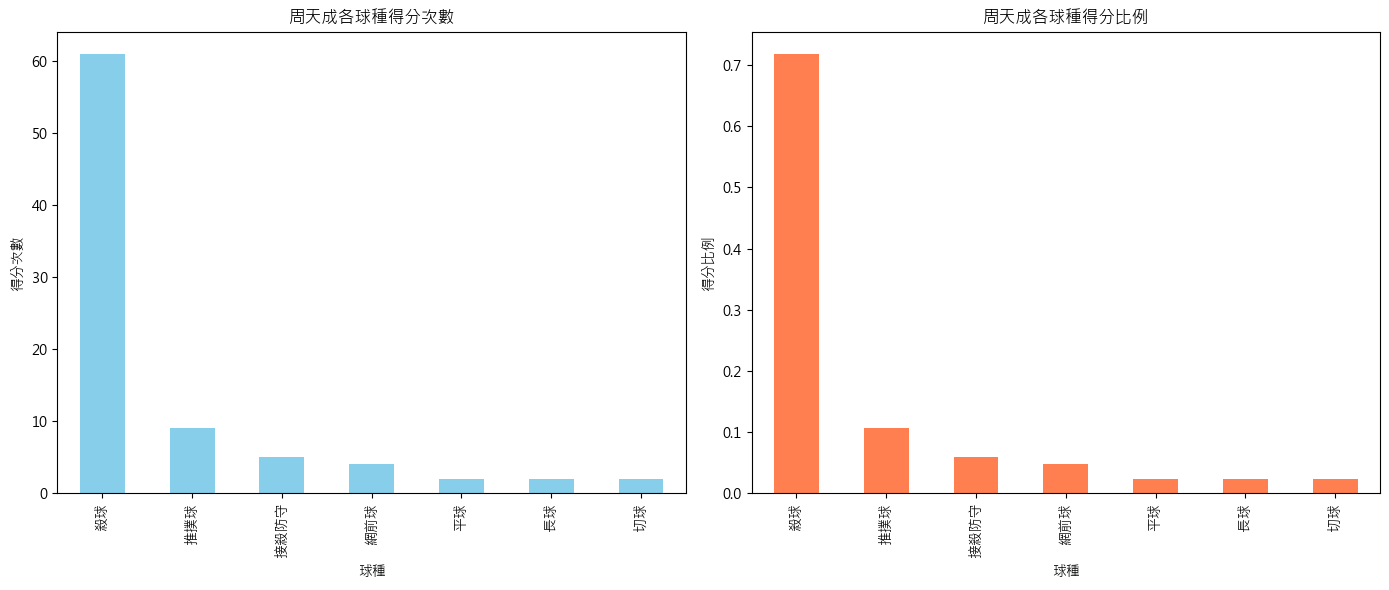

In [3]:
# 引入必要的庫
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集不為空
if len(df) > 0:
    # 過濾出直接得分的數據，即 `player` 為 'CHOU Tien Chen' 且 `getpoint_player` 為 'CHOU Tien Chen'
    chou_scores = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 根據 `player_type` 分組計數得分次數
    chou_score_counts = chou_scores['type'].value_counts()
    
    # 計算各球種得分比例
    chou_score_ratios = chou_score_counts / chou_score_counts.sum()

    # 打印出結果
    print("周天成使用各球種得分的次數：")
    print(chou_score_counts)
    print("\n周天成使用各球種得分的比例：")
    print(chou_score_ratios)

    # Visualize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # 頻次圖 (Counts)
    chou_score_counts.plot(kind='bar', ax=ax[0], color='skyblue', title='周天成各球種得分次數')
    ax[0].set_xlabel('球種')
    ax[0].set_ylabel('得分次數')

    # 比例圖 (Ratios)
    chou_score_ratios.plot(kind='bar', ax=ax[1], color='coral', title='周天成各球種得分比例')
    ax[1].set_xlabel('球種')
    ax[1].set_ylabel('得分比例')

    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用數據。")

第三題(OK)
針對周天成所有「殺球」，繪製其落點熱區圖。

周天成的殺球數量: 299


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2748036356.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


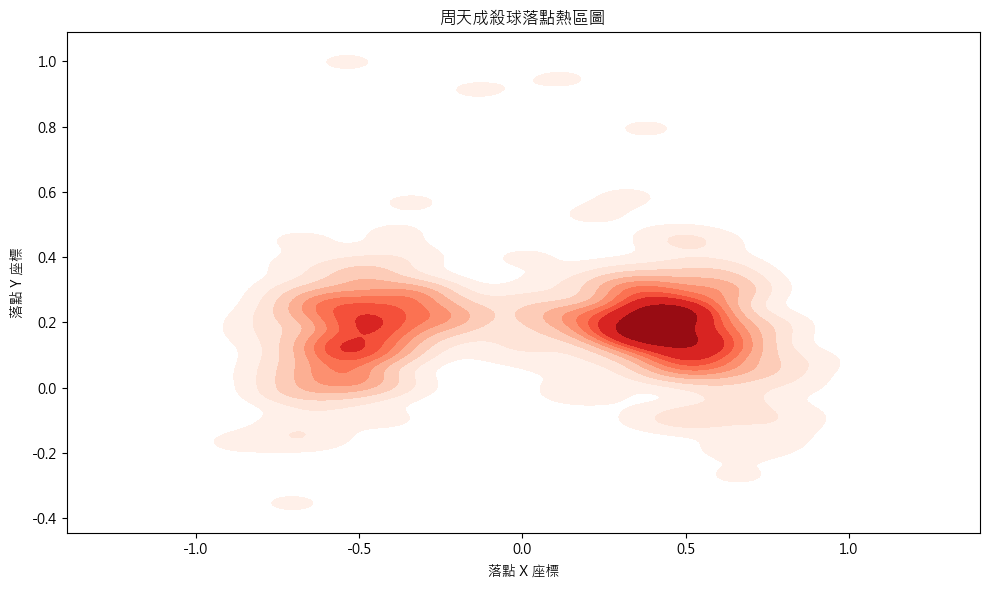

In [4]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定圖表字體以支援繁體中文
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據不為空
if len(df) > 0:
    # 篩選出周天成的所有殺球數據
    chou_smashes = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 確保落點數據完整
    chou_smashes = chou_smashes.dropna(subset=['landing_x', 'landing_y'])

    # 檢查篩選後數據的長度
    print(f"周天成的殺球數量: {len(chou_smashes)}")
    
    # 繪製落點的熱區圖
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=chou_smashes['landing_x'], y=chou_smashes['landing_y'],
        cmap="Reds", shade=True, bw_adjust=0.5
    )
    plt.title('周天成殺球落點熱區圖')
    plt.xlabel('落點 X 座標')
    plt.ylabel('落點 Y 座標')
    plt.axis('equal')  # 保持軸的單位比例
    plt.tight_layout()  # 確保不重疊
    fig = plt.gcf()  # 獲取當前的 figure 對象
else:
    print("數據集為空，無法進行分析。")

# 到這裡，我們完成了對周天成殺球落點的熱區圖的生成。

第四題(OK)
分析周天成在雙方都達18分以上時的球種分布。

周天成在比分達到18以上時所使用的球種分布:
type
網前球     22
接殺防守    11
殺球       7
發短球      6
推撲球      6
長球       5
平球       4
挑球       3
切球       3
Name: count, dtype: int64


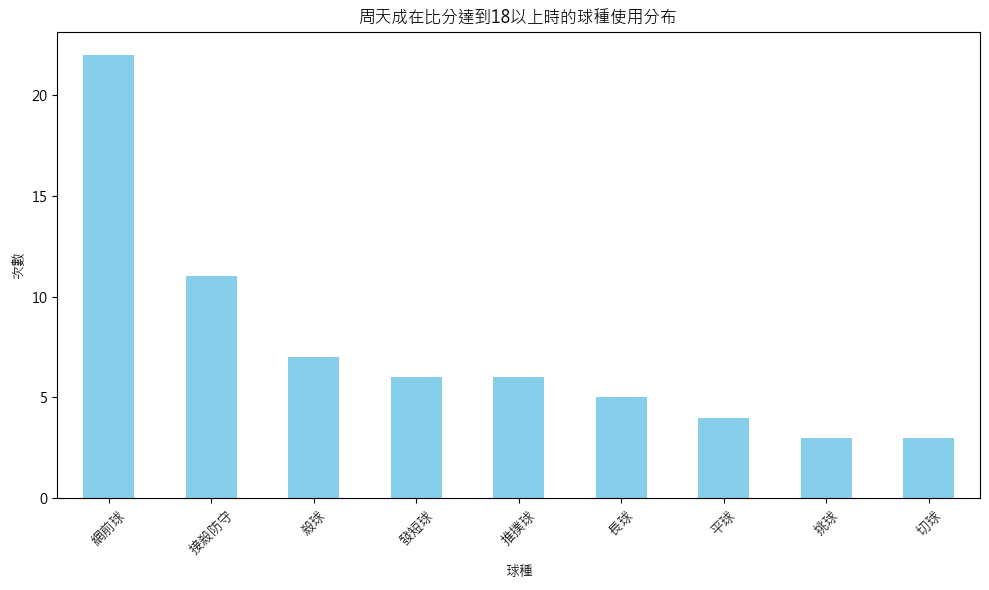

In [5]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據非空
if len(df) > 0:
    # 取得比分都達到18分以上的回合
    filtered_df = df[(df['player_score'] >= 18) & (df['opponent_score'] >= 18)]

    # 過濾周天成的球
    chou_df = filtered_df[filtered_df['player'] == 'CHOU Tien Chen']

    # 計算不同球種的出現次數
    shot_distribution = chou_df['type'].value_counts()

    # 打印分佈
    print("周天成在比分達到18以上時所使用的球種分布:")
    print(shot_distribution)

    # 視覺化球種分布
    fig, ax = plt.subplots(figsize=(10, 6))
    shot_distribution.plot(kind='bar', color='skyblue', ax=ax)
    
    # 標籤和標題
    ax.set_title('周天成在比分達到18以上時的球種使用分布')
    ax.set_xlabel('球種')
    ax.set_ylabel('次數')

    # 設置x軸刻度旋轉
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # 調整圖表布局
    plt.tight_layout()

else:
    print("數據集中無可用的數據進行分析。")

第五題(OK)
幫我繪製周天成造成得分時球的落點熱區圖

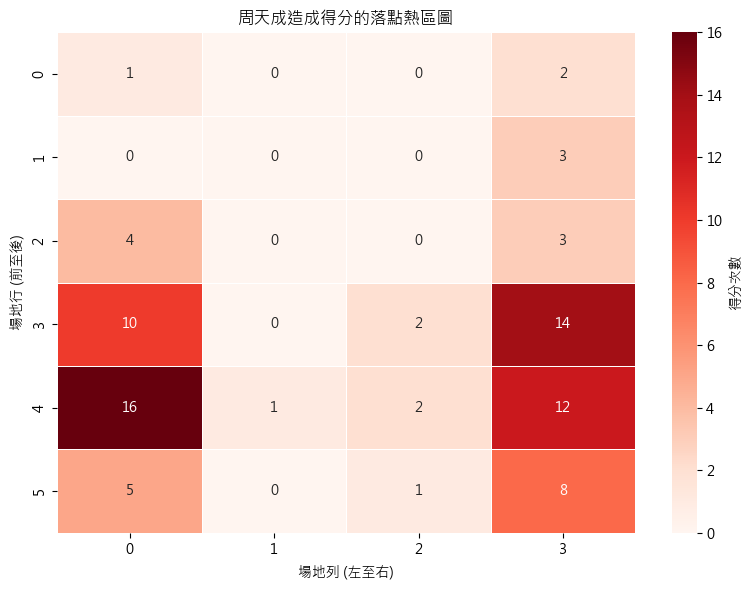

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 字體設置
import platform
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據存在
if len(df) > 0:
    # 篩選出周天成的得分
    chou_score_df = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 確保篩選後的數據量足夠
    if len(chou_score_df) > 0:
        # 根據場地區域來繪製熱區圖
        # 使用np.histogram2d來計算各區域的頻率
        heatmap_data = np.zeros((6, 4))
        zone_mapping = {
            1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3),
            5: (1, 0), 6: (1, 1), 7: (1, 2), 8: (1, 3),
            9: (2, 0), 10: (2, 1), 11: (2, 2), 12: (2, 3),
            13: (3, 0), 14: (3, 1), 15: (3, 2), 16: (3, 3),
            17: (4, 0), 18: (4, 1), 19: (4, 2), 20: (4, 3),
            21: (5, 0), 22: (5, 1), 23: (5, 2), 24: (5, 3)
        }
        
        for area in chou_score_df['landing_area']:
            if area in zone_mapping:
                row, col = zone_mapping[area]
                heatmap_data[row, col] += 1

        # 翻轉數據，方便畫面呈現
        heatmap_data = np.flipud(heatmap_data)

        # 繪製熱區圖
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, ax=ax, cbar_kws={'label': '得分次數'})
        ax.set_title('周天成造成得分的落點熱區圖')
        ax.set_xlabel('場地列 (左至右)')
        ax.set_ylabel('場地行 (前至後)')
        plt.tight_layout()
else:
    print("數據不足以進行分析。")

第六題(OK)
在第一場次中，每回合用的拍數，繪圖

     match_id  set  rally  ball_round
0         1.0    1      1           2
1         1.0    1      2           6
2         1.0    1      3          27
3         1.0    1      4           6
4         1.0    1      5          16
..        ...  ...    ...         ...
102       1.0    3     35          24
103       1.0    3     36           2
104       1.0    3     37           6
105       1.0    3     38          17
106       1.0    3     39          13

[107 rows x 4 columns]


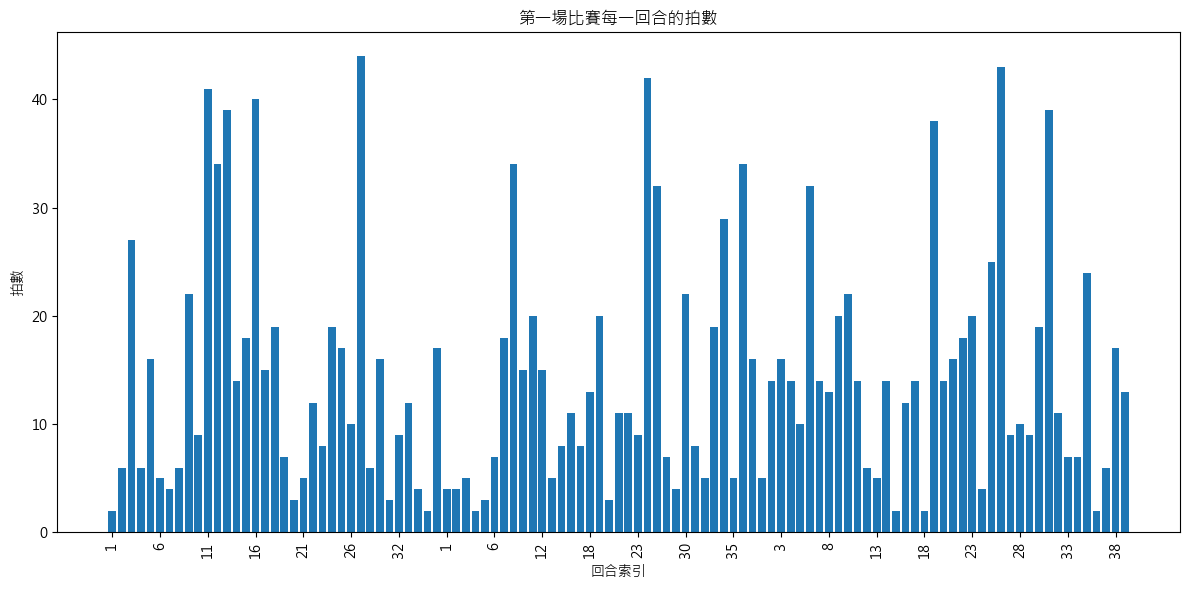

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認資料是否存在
if len(df) > 0:
    # 篩選第一場比賽
    match_1_df = df[df['match_id'] == 1.0]

    # 計算每一回合的拍數
    rally_shots = match_1_df.groupby(['match_id', 'set', 'rally'])['ball_round'].max().reset_index()

    # 打印每一回合的拍數
    print(rally_shots)

    # 視覺化
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(rally_shots.index, rally_shots['ball_round'])
    ax.set_title('第一場比賽每一回合的拍數')
    ax.set_xlabel('回合索引')
    ax.set_ylabel('拍數')
    
    # 設置 X 軸標籤間隔
    step = max(1, len(rally_shots) // 20)  # 每隔 20 個顯示一個標籤
    ax.set_xticks(rally_shots.index[::step])
    ax.set_xticklabels(rally_shots['rally'][::step], rotation=90)
    
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty, no data to process.")

第七題(OK)
繪製周天成殺球時的站點熱區圖

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 篩選數據: 周天成的殺球站位
chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

# 繪圖
if len(chou_smash_df) > 0:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=chou_smash_df['player_location_x'], y=chou_smash_df['player_location_y'], cmap="Reds", shade=True, bw_adjust=0.5)
    
    # 標題和標籤
    plt.title('周天成殺球站位熱區圖')
    plt.xlabel('X 座標')
    plt.ylabel('Y 座標')
    plt.xlim(-0.8, 0.8)  # 設定X軸範圍
    plt.ylim(-0.5, 1.0)  # 設定Y軸範圍

    plt.tight_layout()
    plt.show()
else:
    print("沒有符合條件的數據可用於分析。")

第八題(大致OK)
分析周天成使用殺球，對手都用什麼球種反擊，繪製圓餅圖

next_player_type
其他        6
接殺防守    169
網前球      38
Name: count, dtype: int64


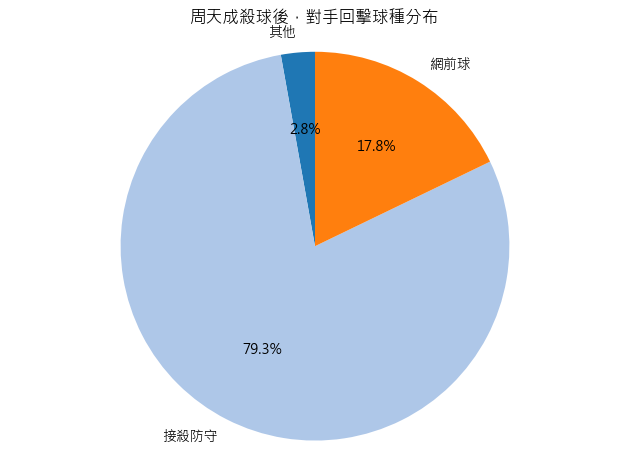

In [9]:
# Import the necessary libraries
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據量是否大於0
if len(df) > 0:
    # 在完整的數據框中，為每個組合（'match_id', 'set', 'rally'）添加下一個球的'player_type'
    df['next_player_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(-1)

    # 過濾周天成使用殺球的行
    chou_smashed = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 過濾掉 NaN，得到周天成殺球後的對手回擊球種
    chou_smashed_next = chou_smashed.dropna(subset=['next_player_type'])

    # 定義球種名稱對應的字典
    shot_type_map = {
        1.0: '發短球',
        2.0: '發長球',
        3.0: '長球',
        4.0: '殺球',
        5.0: '切球',
        6.0: '挑球',
        7.0: '平球',
        8.0: '網前球',
        9.0: '推撲球',
        10.0: '接殺防守',
        11.0: '接不到'
    }

    # 計算周天成殺球後對手回擊球種的分布
    counter_shot_distribution = chou_smashed_next['next_player_type'].map(shot_type_map).value_counts()

    # 合併小比例的類別為 "其他"
    threshold = 0.05 * counter_shot_distribution.sum()
    counter_shot_distribution = counter_shot_distribution.groupby(lambda x: x if counter_shot_distribution[x] >= threshold else '其他').sum()

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    ax.pie(counter_shot_distribution, labels=counter_shot_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # 圖表標題
    ax.set_title('周天成殺球後，對手回擊球種分布')

    # 使用tight layout
    plt.tight_layout()

    # 打印反擊球種分布數據
    print(counter_shot_distribution)

第九題(OK)
當周天成在「後場」擊球時，他最常使用哪三種球種?

In [8]:
import pandas as pd

# 確認 df 是否已載入並且有資料
if 'df' in globals() and len(df) > 0:
    # 篩選出周天成在後場擊球記錄
    back_court_df = df[
        (df['player'] == 'CHOU Tien Chen') &
        (df['hit_area'].isin([1, 2, 3, 4]))
    ]

    # 確認篩選後的資料是否非空
    if len(back_court_df) > 0:
        # 統計在後場擊球的球種使用頻率
        shot_type_counts = back_court_df['type'].value_counts()

        # 取得使用次數最多的三種球種
        top_3_shot_types = shot_type_counts.head(3)
        
        # 打印結果
        print("周天成在後場最常使用的三種球種是：")
        print(top_3_shot_types)
    else:
        print("無法找到周天成的後場擊球資料。")
else:
    print("資料框架 df 不存在或無資料。")

周天成在後場最常使用的三種球種是：
type
長球    227
殺球    176
切球    175
Name: count, dtype: int64


第十題(OK)
分析周天成站在前中後場，分別的得分與失分數

  場地區域  得分   失分
0   前場   9   13
1   中場  75  131
2   後場   1   16


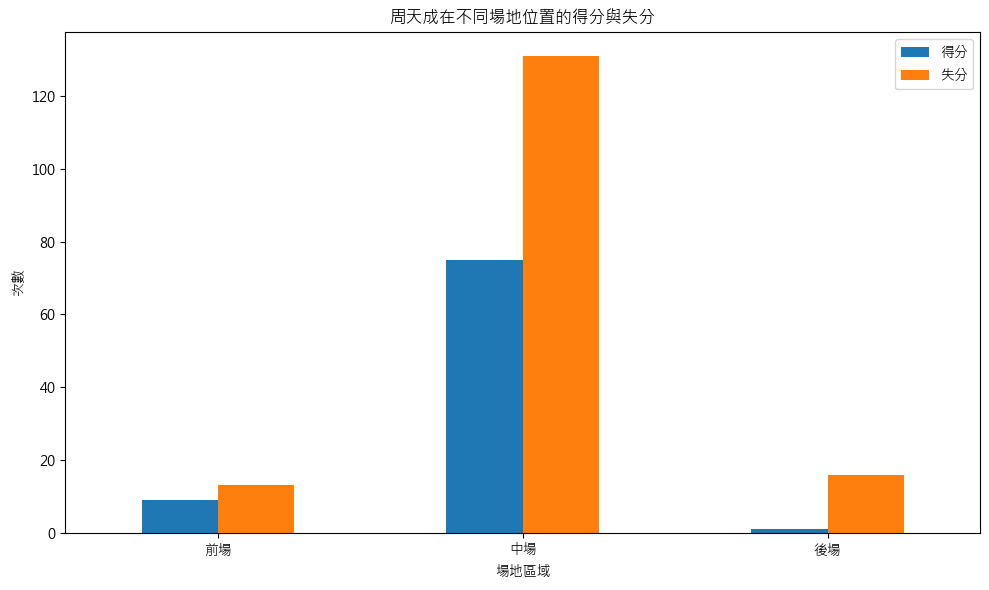

In [10]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被定義
if len(df) > 0:
    # 區域定義
    front_court_zones = [17, 18, 19, 20, 21, 22, 23, 24]
    mid_court_zones = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    back_court_zones = [1, 2, 3, 4]

    # 過濾出周天成相關的數據
    chou_tien_chen_df = df[df['player'] == 'CHOU Tien Chen']

    # 計算區域得分和失分
    area_performance = []
    for court_area, zones in zip(['前場', '中場', '後場'], 
                                 [front_court_zones, mid_court_zones, back_court_zones]):
        area_df = chou_tien_chen_df[chou_tien_chen_df['player_location_area'].isin(zones)]
        
        # 得分
        score_df = area_df[area_df['getpoint_player'] == 'CHOU Tien Chen']
        score_count = score_df.shape[0]

        # 失分
        lose_df = area_df[area_df['getpoint_player'] == 'Kento MOMOTA']
        lose_count = lose_df.shape[0]

        area_performance.append((court_area, score_count, lose_count))

    # 轉為 DataFrame
    performance_df = pd.DataFrame(area_performance, columns=['場地區域', '得分', '失分'])
    print(performance_df)

    # 畫圖
    fig, ax = plt.subplots(figsize=(10, 6))
    performance_df.plot(kind='bar', x='場地區域', stacked=False, ax=ax)
    ax.set_title('周天成在不同場地位置的得分與失分')
    ax.set_xlabel('場地區域')
    ax.set_ylabel('次數')
    ax.legend(['得分', '失分'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第11題(OK)
當周天成站在前場時，他最主要的得分方式?

周天成在前場的得分方式分佈：
type
殺球     7
推撲球    2
Name: count, dtype: int64


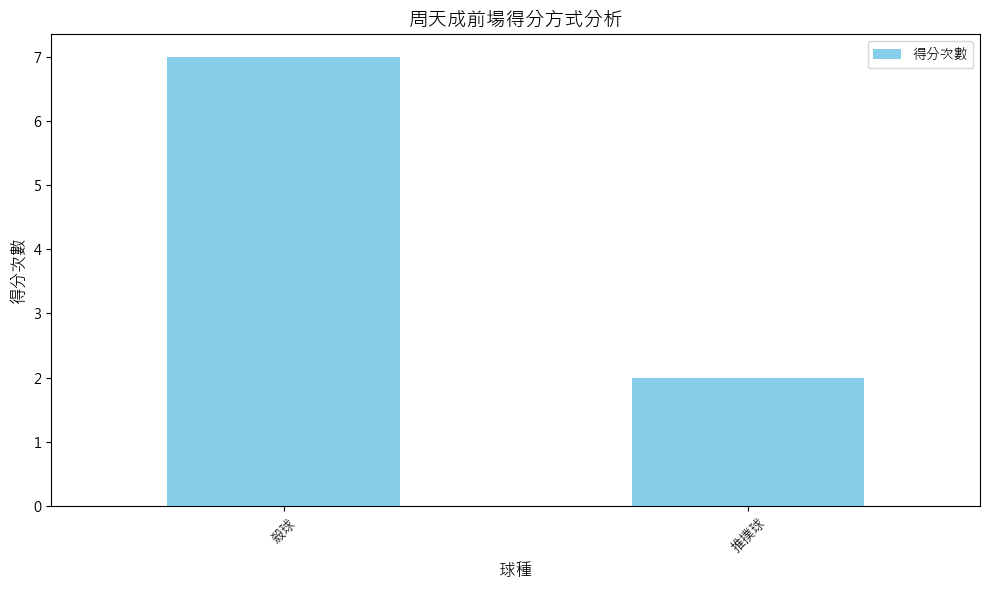

In [11]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集非空
if len(df) > 0:
    # 定義前場位置區域
    front_court_zones = [17, 18, 19, 20, 21, 22, 23, 24]

    # 篩選周天成在前場擊球且得分的數據
    chou_front_win_df = df[(df['player'] == 'CHOU Tien Chen') &
                           (df['player_location_area'].isin(front_court_zones)) &
                           (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 確認篩選條件有效性
    if len(chou_front_win_df) > 0:
        # 統計各球種的得分次數
        shot_type_points = chou_front_win_df['type'].value_counts()

        # 打印每種球技得分數據
        print("周天成在前場的得分方式分佈：")
        print(shot_type_points)

        # 視覺化得分數據
        fig, ax = plt.subplots(figsize=(10, 6))
        shot_type_points.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title("周天成前場得分方式分析", fontsize=14)
        ax.set_xlabel("球種", fontsize=12)
        ax.set_ylabel("得分次數", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend(["得分次數"])
    else:
        print("無數據顯示周天成在前場位置時的得分情況。")
else:
    print("數據集中沒有可用的記錄。")

第12題(OK)
計算周天成站在前場擊球時的落點分布。

周天成在前場擊球時的落點頻率如下：
landing_area
1.0      2
2.0      3
3.0      4
4.0      3
5.0      5
6.0      3
7.0      3
8.0      6
9.0      7
10.0     8
11.0     7
12.0    10
14.0     3
15.0     1
16.0     2
17.0     2
18.0     1
19.0     1
20.0     2
21.0     3
22.0     3
24.0     1
26.0     2
28.0     2
30.0     2
33.0     2
Name: count, dtype: int64


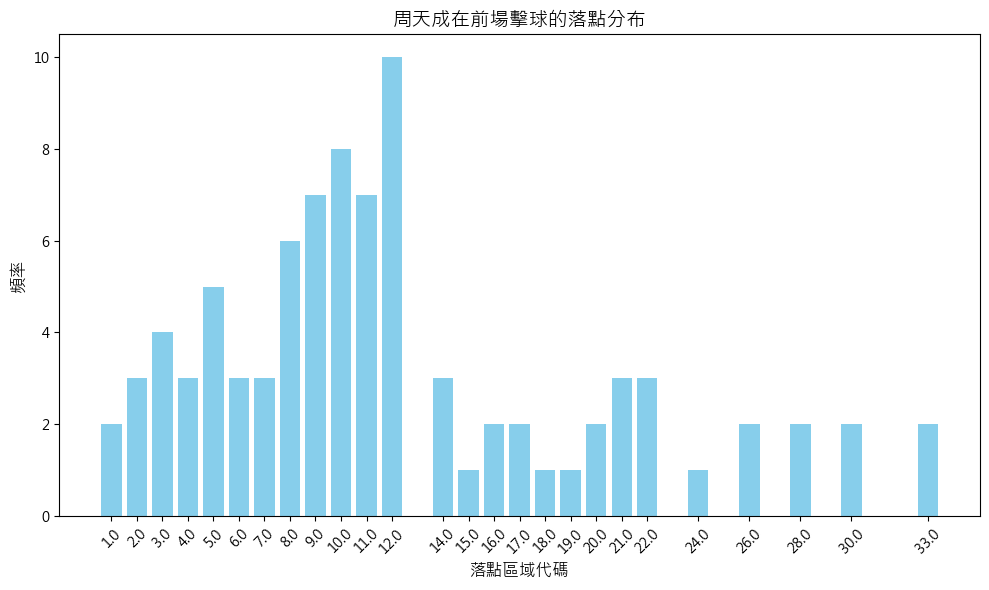

In [12]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 設置字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據是否存在
if len(df) > 0:
    # 過濾周天成站在前場擊球的數據
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    if len(filtered_df) > 0:
        # 計算各落點區域的出現頻率
        landing_area_counts = filtered_df['landing_area'].value_counts().sort_index()

        # 可視化落點分布
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(landing_area_counts.index, landing_area_counts.values, color='skyblue')
        ax.set_xlabel('落點區域代碼', fontsize=12)
        ax.set_ylabel('頻率', fontsize=12)
        ax.set_title('周天成在前場擊球的落點分布', fontsize=14)
        ax.set_xticks(landing_area_counts.index)  # 使用正確的區域代碼作為ticks
        ax.set_xticklabels(landing_area_counts.index)
        plt.xticks(rotation=45)
        plt.tight_layout()

        print(f"周天成在前場擊球時的落點頻率如下：\n{landing_area_counts}")
    else:
        print("無周天成在前場擊球的相關數據。")
else:
    print("數據框 df 為空。")

第13題(OK)
分析周天成站在前中後場擊球時，自己分別的移動距離

In [17]:
import numpy as np
import pandas as pd

# 驗證數據集是否不為空
if len(df) == 0:
    raise ValueError("數據集為空。")

# 過濾出周天成的數據
chou_data = df[df['player'] == 'CHOU Tien Chen'].copy()

# 針對 NaN 使用 dropna 處理所需欄位
chou_data = chou_data.dropna(subset=['player_location_area', 'player_move_x', 'player_move_y'])

# 計算移動距離
chou_data['move_distance'] = np.sqrt(chou_data['player_move_x']**2 + chou_data['player_move_y']**2)

# 分別計算前場、中場和後場的平均移動距離
front_court_area = [17, 18, 19, 20, 21, 22, 23, 24]
mid_court_area = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
back_court_area = [1, 2, 3, 4]

front_court_distance = chou_data[chou_data['player_location_area'].isin(front_court_area)]['move_distance'].mean()
mid_court_distance = chou_data[chou_data['player_location_area'].isin(mid_court_area)]['move_distance'].mean()
back_court_distance = chou_data[chou_data['player_location_area'].isin(back_court_area)]['move_distance'].mean()

print(f"前場平均移動距離: {front_court_distance:.2f}")
print(f"中場平均移動距離: {mid_court_distance:.2f}")
print(f"後場平均移動距離: {back_court_distance:.2f}")

前場平均移動距離: 0.23
中場平均移動距離: 0.32
後場平均移動距離: 0.34


第14題(OK)
幫我統整周天成所有球種的使用比例，以及每種球種的「得分次數」和「失誤次數」。

球種使用比例 (%):
type
切球       8.087390
平球       4.062859
挑球      10.348793
接殺防守    13.453430
推撲球     12.801840
殺球      11.460330
發短球      5.634343
發長球      1.303181
網前球     22.307397
長球      10.540437
Name: proportion, dtype: float64

每種球種的得分次數:
type
切球       2
平球       2
接殺防守     5
推撲球      9
殺球      61
網前球      4
長球       2
Name: type, dtype: int64

每種球種的失誤次數:
type
切球       7
平球       7
挑球      17
接殺防守    37
推撲球     19
殺球      20
網前球     40
長球      11
Name: type, dtype: int64


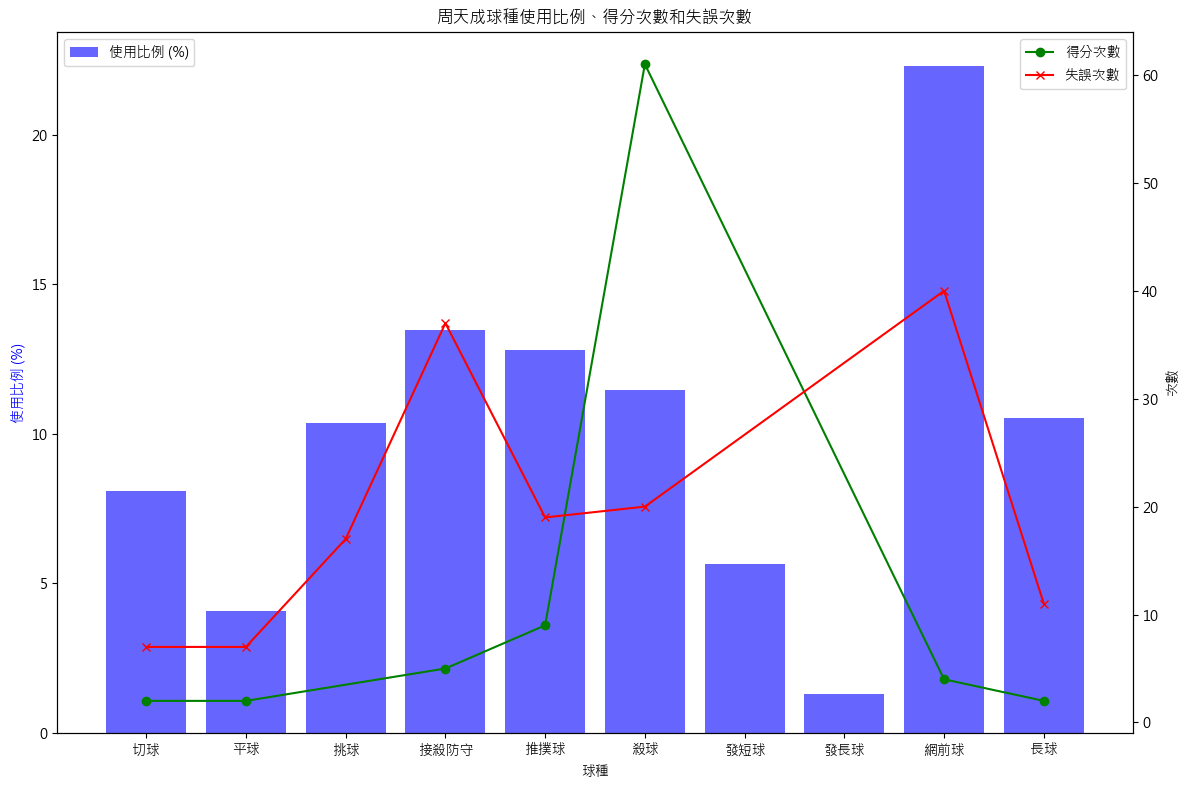

In [18]:
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據是否存在
if len(df) > 0:
    # 篩選出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 計算球種使用比例
    type_counts = chou_df['type'].value_counts(normalize=True) * 100
    type_counts = type_counts.sort_index()

    # 計算每種球種的得分次數
    win_counts = chou_df[(chou_df['getpoint_player'] == 'CHOU Tien Chen')].groupby('type')['type'].count()

    # 計算每種球種的失誤次數
    lose_counts = chou_df[(chou_df['getpoint_player'] != 'CHOU Tien Chen') & (~chou_df['lose_reason'].isna())].groupby('type')['type'].count()

    # 圖表合併三個信息
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # 繪製使用比例
    ax1.bar(type_counts.index, type_counts.values, color='b', alpha=0.6, label='使用比例 (%)')
    ax1.set_xlabel('球種')
    ax1.set_ylabel('使用比例 (%)', color='b')
    ax1.legend(loc='upper left')

    # 第二軸，共用 x 軸
    ax2 = ax1.twinx()
    ax2.plot(win_counts.index, win_counts.values, label='得分次數', color='g', marker='o')
    ax2.plot(lose_counts.index, lose_counts.values, label='失誤次數', color='r', marker='x')
    ax2.set_ylabel('次數', color='k')
    ax2.legend(loc='upper right')

    plt.title('周天成球種使用比例、得分次數和失誤次數')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Print important information
    print("球種使用比例 (%):")
    print(type_counts)
    print("\n每種球種的得分次數:")
    print(win_counts)
    print("\n每種球種的失誤次數:")
    print(lose_counts)

    # 返回繪製的圖表
    fig

第15題(OK)
幫我畫周天成失分原因的圓餅圖

周天成失分原因統計:
lose_reason
其他      2
出界     74
掛網     60
未過網    24
Name: count, dtype: int64


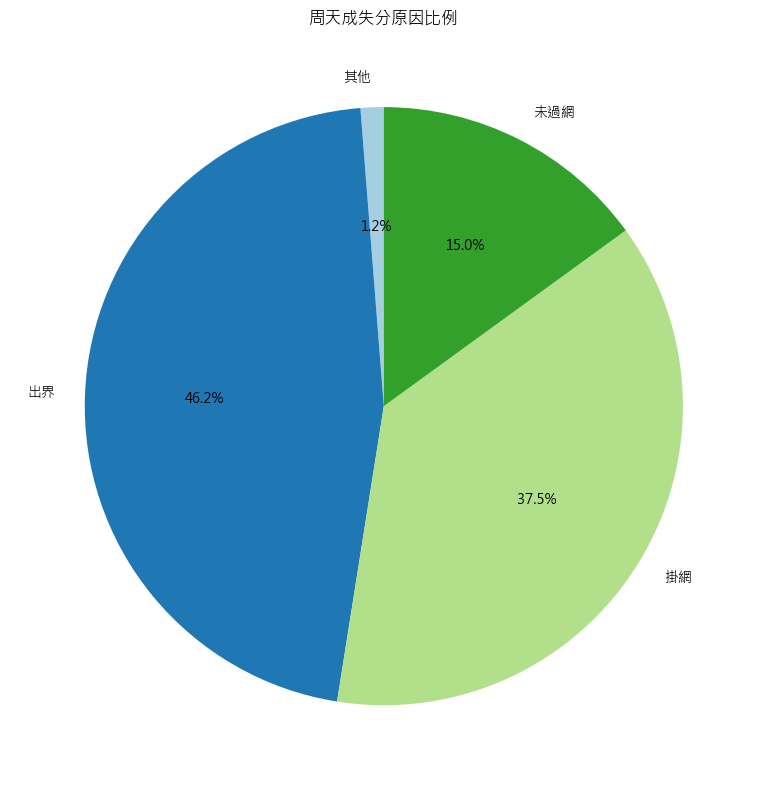

In [19]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 假設 df 已經定義並包含所需的數據

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# Step 1: 資料篩選
if len(df) > 0:
    # 過濾出周天成失分的情況
    chou_loss_df = df[(df['getpoint_player'] == 'Kento MOMOTA') & (df['lose_reason'].notna())]

    # Step 2: 統計失分原因
    lose_reason_counts = chou_loss_df['lose_reason'].value_counts()

    # 合併小於5%的類別為「其他」
    threshold = 0.05 * lose_reason_counts.sum()
    lose_reason_counts = lose_reason_counts.groupby(lambda x: x if lose_reason_counts[x] >= threshold else '其他').sum()

    # Step 3: 視覺化
    fig, ax = plt.subplots(figsize=(8, 8))

    # 圓餅圖
    ax.pie(
        lose_reason_counts,
        labels=lose_reason_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )

    ax.set_title('周天成失分原因比例')

    plt.tight_layout()

# 打印詳細失分原因計數
print("周天成失分原因統計:")
print(lose_reason_counts)

第16題(wrong)
在10拍以上的回合中，周天成的得分率是多少？

In [ ]:
#正確代碼
import pandas as pd

# 確認是否有數據可用
if len(df) > 0:
    # Step 2: 篩選出持續10拍以上的回合
    valid_rallies = df[df['ball_round'] > 10]

    # Step 3: 計算得分與總回合
    # 確保每個回合的唯一性
    rally_groups = valid_rallies.groupby(['match_id', 'set', 'rally'])

    # 分組後存取getpoint_player非空值的最後一筆資料確認得分者
    rally_winners = rally_groups['getpoint_player'].last().dropna()

    # 篩選出周天成得分的回合
    chou_tien_chen_wins = rally_winners[rally_winners == 'CHOU Tien Chen']

    # 計算得分與總回合
    chou_tien_chen_wins_count = len(chou_tien_chen_wins)
    total_valid_rallies_count = len(rally_winners)

    # Calculate the score rate
    chou_tien_chen_score_rate = chou_tien_chen_wins_count / total_valid_rallies_count if total_valid_rallies_count != 0 else 0

    # Print the results
    print(f"周天成在持續10拍以上的回合中的得分率: {chou_tien_chen_score_rate:.2%}")
else:
    print("數據不足以進行分析。")

周天成在持續10拍以上的回合中的得分率: 46.83%


第17題(OK)
給我所有局的最終得分數

In [21]:
import pandas as pd

# 確保數據的有效性
if len(df) > 0:
    # 過濾出每個 match_id 和 set 的最後一個 rally
    last_rallies = df.groupby(['match_id', 'set']).tail(1)

    # 計算最終比分
    last_rallies['final_player_score'] = last_rallies['player_score'] + (last_rallies['getpoint_player'] == 'Kento MOMOTA').astype(int)
    last_rallies['final_opponent_score'] = last_rallies['opponent_score'] + (last_rallies['getpoint_player'] == 'CHOU Tien Chen').astype(int)

    # 提取所需的列：match_id, set, final_player_score, final_opponent_score
    final_scores = last_rallies[['match_id', 'set', 'final_player_score', 'final_opponent_score']]
    
    # 打印出每局的最終得分
    print(final_scores)
else:
    print("DataFrame is empty.")

      match_id  set  final_player_score  final_opponent_score
517        1.0    1                22.0                  15.0
967        1.0    2                17.0                  22.0
1548       1.0    3                22.0                  18.0
1959       3.0    1                22.0                  19.0
2353       3.0    2                22.0                  17.0
2722       5.0    1                22.0                  13.0
3028       5.0    2                11.0                  22.0
3426       5.0    3                22.0                  16.0
3841       6.0    1                22.0                  21.0
4110       6.0    2                16.0                  22.0
4455       6.0    3                22.0                  15.0
4927       7.0    1                22.0                  19.0
5203       7.0    2                19.0                  12.0


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\4003974762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rallies['final_player_score'] = last_rallies['player_score'] + (last_rallies['getpoint_player'] == 'Kento MOMOTA').astype(int)
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\4003974762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rallies['final_opponent_score'] = last_rallies['opponent_score'] + (last_rallies['getpoint_player'] == 'CHOU Tien Chen').astype(int)


第18題(OK)
分析周天成前一拍打什麼球種最容易造成對手未過網？

周天成前一拍使用的球種，造成對手未過網的次數：
type
殺球      5
推撲球     3
網前球     2
平球      1
長球      1
接殺防守    1
Name: count, dtype: int64
Figure(1000x600)


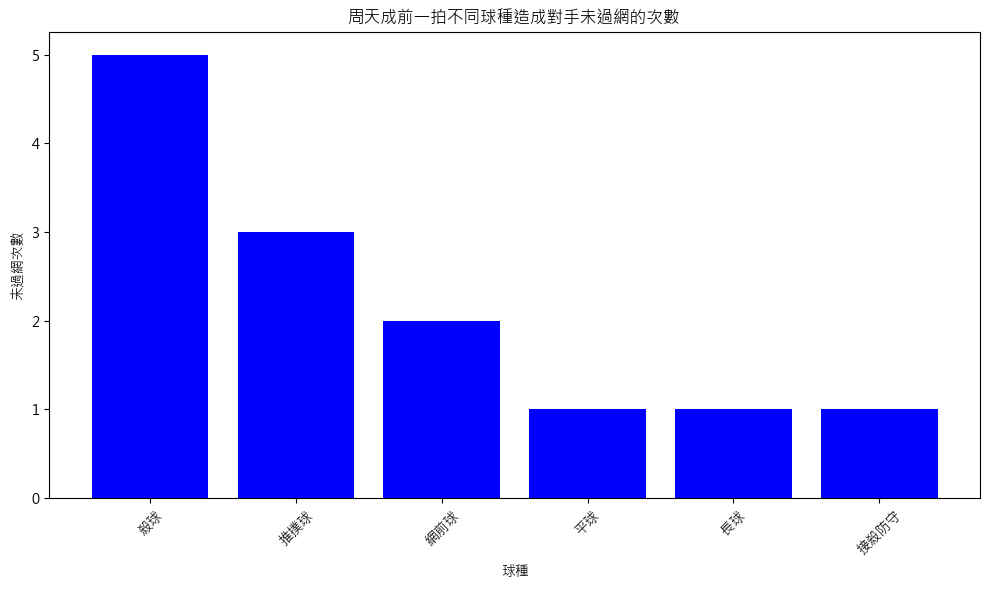

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保df非空
if len(df) > 0:
    # 1. 找出周天成作為擊球球員的數據
   #chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 2. 使用 shift 方法獲取下一拍的數據，並且下一拍的 'lose_reason' 是 '未過網'
    df['next_lose_reason'] = df['lose_reason'].shift(-1)
    df['next_player'] = df['player'].shift(-1)
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    # 3. 篩選對手的失誤原因是「未過網」
    unforced_errors_df = chou_df[(chou_df['next_lose_reason'] == '未過網') & (chou_df['next_player'] != 'CHOU Tien Chen')]

    # 4. 統計前一拍周天成使用的球種
    shot_count = unforced_errors_df['type'].value_counts()

    # 打印數據
    print("周天成前一拍使用的球種，造成對手未過網的次數：")
    print(shot_count)

    # 5. 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(shot_count.index, shot_count.values, color='b')
    ax.set_xlabel('球種')
    ax.set_ylabel('未過網次數')
    ax.set_title('周天成前一拍不同球種造成對手未過網的次數')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 打印fig物件
    print(fig)
else:
    print("數據集為空，無法進行分析。")

第19題(wrong:時序shift問題)
當對手被周天成從後場調動到「前場」時，對手最常使用什麼球種？

In [24]:
import pandas as pd

# Step 1: 檢查數據集的長度
if len(df) == 0:
    raise ValueError("數據集中沒有資料可供分析。")

# Step 2: 選擇與周天成相關數據
df_chou = df[df['player'] == 'CHOU Tien Chen']

# 為了便於分析，提取相關的索引信息
df_chou = df_chou.reset_index(drop=True)

# Step 3: 確認對手在後排（zone 1-4）擊球後且下一拍移動到前場（zone 17-24）的次數
df_chou['prev_opponent_location_area'] = df_chou.groupby(['match_id', 'set', 'rally'])['opponent_location_area'].shift(1)
df_chou['next_opponent_location_area'] = df_chou.groupby(['match_id', 'set', 'rally'])['opponent_location_area'].shift(-1)

# 選擇後排到前場的移動
def is_move_back_to_front(row):
    return (row['prev_opponent_location_area'] in [1, 2, 3, 4]) and (row['opponent_location_area'] in range(17, 25))

# 確認對手調動
df_chou_back_to_front = df_chou[df_chou.apply(is_move_back_to_front, axis=1)]

# Step 4: 對手在前場的第一拍使用的球種
first_shot_in_front = df_chou_back_to_front['opponent_type'].dropna()

# Step 5: 統計這些球種的使用頻率
shot_type_counts = first_shot_in_front.value_counts()

# 找出最常用的球種
most_common_type = shot_type_counts.idxmax()

# 打印結果: 最常用的球種代碼與對應中文名稱
shot_type_mapping = {
    1: '發短球', 2: '發長球', 3: '長球', 4: '殺球', 5: '切球',
    6: '挑球', 7: '平球', 8: '網前球', 9: '推撲球', 10: '接殺防守', 11: '接不到'
}

most_common_shot_name = shot_type_mapping.get(most_common_type, '未知球種')
print(f"當對手從後排調動到前場時，最常使用的球種是: {most_common_shot_name}（代碼: {most_common_type}）")

當對手從後排調動到前場時，最常使用的球種是: 網前球（代碼: 8.0）


第20題(OK)
幫我比較周天成（CHOU Tien Chen）他在短回合（<=4拍）、中回合（5-10拍）、長回合（>=11拍）中的勝率

總回合數:
rally_length_category
中回合    139
短回合     65
長回合    205
dtype: int64

周天成贏得的回合數:
rally_length_category
中回合    62
短回合    34
長回合    96
dtype: int64

周天成的勝率:
rally_length_category
中回合    0.446043
短回合    0.523077
長回合    0.468293
dtype: float64


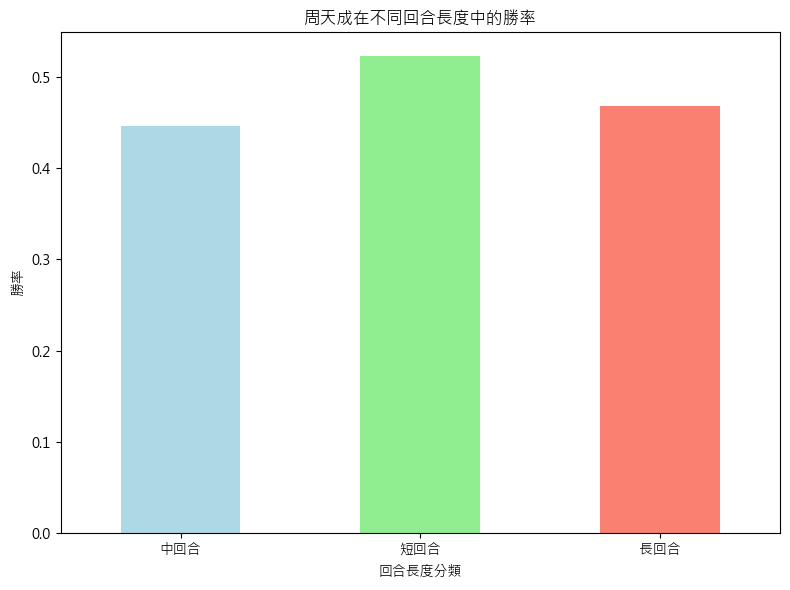

In [23]:
# 確保字體設定
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 驗證數據是否存在
if len(df) > 0:
    # 分類回合長度
    def categorize_rally_length(ball_round):
        if ball_round <= 4:
            return '短回合'
        elif 5 <= ball_round <= 10:
            return '中回合'
        else:
            return '長回合'
    
    # 增加一個新的分類欄位
    df['rally_length_category'] = df['ball_round'].apply(categorize_rally_length)
    
    # 確保以每個rally的最後一拍作為分組結果
    rally_end_df = df.groupby(['match_id', 'set', 'rally']).last().reset_index()
    
    # 篩選出周天成勝出的回合
    chou_win_df = rally_end_df[rally_end_df['getpoint_player'] == 'CHOU Tien Chen']

    # 計算每個回合長度類別的總回合數和周天成贏的回合數
    total_rallies = rally_end_df.groupby('rally_length_category').size()
    chou_wins = chou_win_df.groupby('rally_length_category').size()
    
    # 計算周天成在每個回合長度類別的勝率
    chou_win_rate = (chou_wins / total_rallies).fillna(0)  # 填充 NaN 為 0

    # 打印計算出來的勝率
    print("總回合數:")
    print(total_rallies)
    print("\n周天成贏得的回合數:")
    print(chou_wins)
    print("\n周天成的勝率:")
    print(chou_win_rate)
    
    # 可視化
    fig, ax = plt.subplots(figsize=(8, 6))
    chou_win_rate.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'], ax=ax)

    ax.set_title('周天成在不同回合長度中的勝率')
    ax.set_xlabel('回合長度分類')
    ax.set_ylabel('勝率')
    plt.xticks(rotation=0)
    plt.tight_layout()
    
else:
    print("數據集中沒有數據。")

第21題(OK)
當周天成的對手處於「前場」時，周天成打球的落點分布

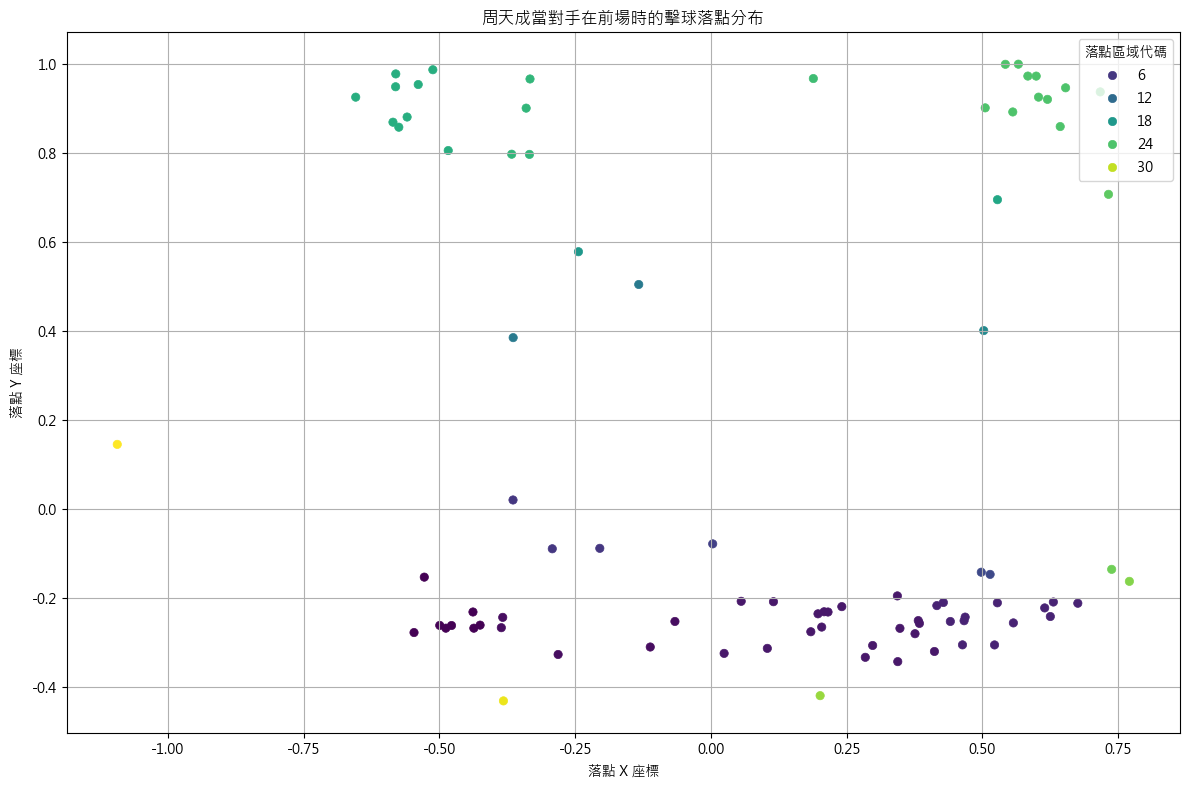

In [25]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據框有數據
if len(df) > 0:
    # 篩選條件：周天成為 player 且對手在前場區域
    filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['opponent_location_area'].isin([17, 18, 19, 20, 21, 22, 23, 24]))]

    # 確保篩選後數據框有數據
    if len(filtered_df) > 0:
        # 繪製散點圖顯示擊球落點
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=filtered_df, x='landing_x', y='landing_y', hue='landing_area', palette='viridis', edgecolor=None)
        plt.title('周天成當對手在前場時的擊球落點分布')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.grid(True)
        plt.tight_layout()
        plt.legend(title='落點區域代碼', loc='upper right')
        fig = plt.gcf()  # 獲得當前圖表對象以便外部操作
    else:
        print("沒有符合條件的數據可以進行分析。")
else:
    print("數據框為空，無法進行分析。")

第22題(OK)
分析周天成使用殺球造成失誤，請繪製失誤原因的圓餅圖

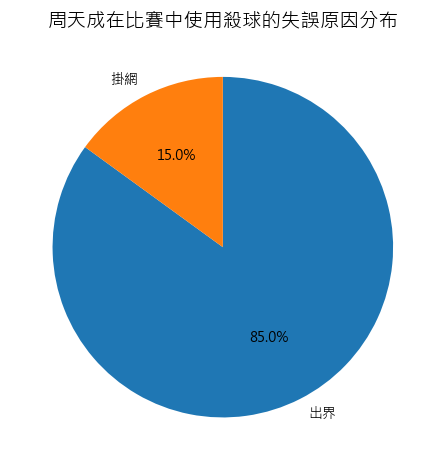

周天成使用殺球造成失誤的原因分布：
lose_reason
出界    17
掛網     3
Name: count, dtype: int64


In [26]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保 df 存在且大於零
if len(df) > 0:
    # 篩選出周天成的殺球失誤資料
    chou_smash_errors = df[(df['player'] == 'CHOU Tien Chen') & 
                           (df['type'] == '殺球') &
                           (df['lose_reason'].notna())]

    # 統計不同失誤原因的次數
    error_reasons_count = chou_smash_errors['lose_reason'].value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    ax.pie(error_reasons_count, labels=error_reasons_count.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title('周天成在比賽中使用殺球的失誤原因分布', fontsize=14)
    
    plt.tight_layout()  # 確保不重疊
    plt.show()

    # 打印詳細結算信息
    print("周天成使用殺球造成失誤的原因分布：")
    print(error_reasons_count)
else:
    print("DataFrame is empty. Ensure data is loaded correctly.")

第23題(OK)
給我周天成最常見的失分原因

失分原因分佈：
lose_reason
出界     74
掛網     60
未過網    24
Name: count, dtype: int64


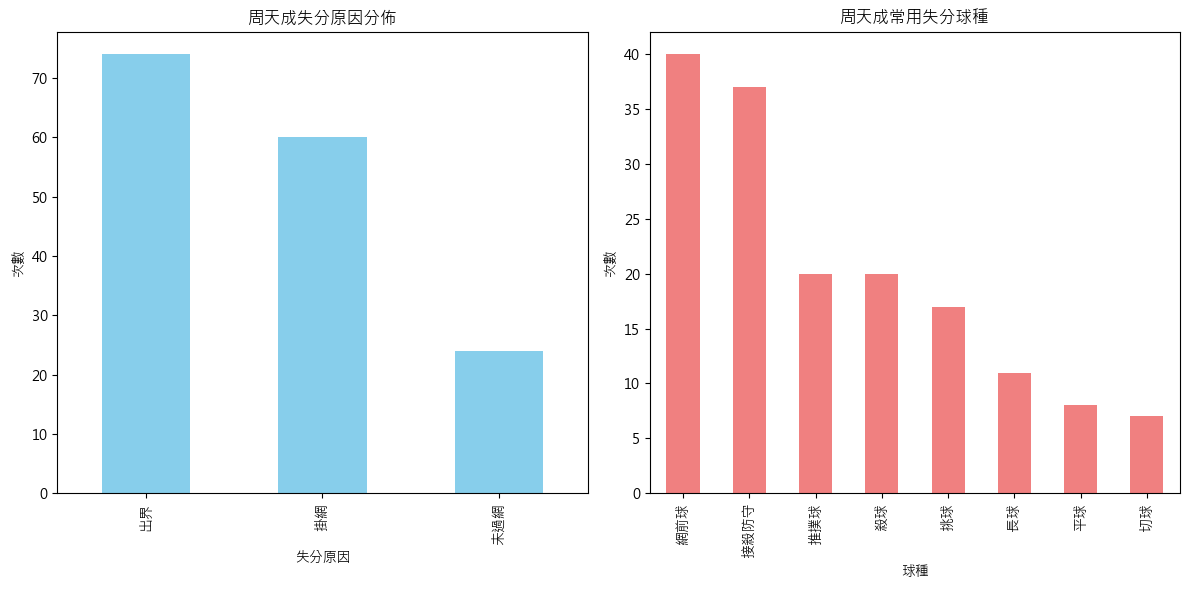

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集不為空
if len(df) > 0:
    # 篩選周天成作為擊球者但由對手得分的情況
    chou_df = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'Kento MOMOTA')]
    
    # 計算失分原因的分佈
    lose_reason_count = chou_df['lose_reason'].value_counts(dropna=True)
    
    # 打印失分原因
    print("失分原因分佈：")
    print(lose_reason_count)

    # 總結球種在失分中的情況
    type_count = chou_df['type'].value_counts(dropna=True)

    # 視覺化
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # 失分原因圖表
    lose_reason_count.plot(kind='bar', ax=ax[0], color='skyblue')
    ax[0].set_title('周天成失分原因分佈')
    ax[0].set_xlabel('失分原因')
    ax[0].set_ylabel('次數')
    
    # 球種分佈圖表
    type_count.plot(kind='bar', ax=ax[1], color='lightcoral')
    ax[1].set_title('周天成常用失分球種')
    ax[1].set_xlabel('球種')
    ax[1].set_ylabel('次數')
    
    plt.tight_layout()
    plt.show()
else:
    print("數據集為空，無法進行分析。")

第24題(wrong)
在周天成的所有失分中，有多少百分比是因為對手的殺球導致的？

In [28]:
# Step 1: 驗證數據量
if len(df) > 0:
    # Step 2: 篩選失分情況 (周天成的失分)
    chou_lose_df = df[df['getpoint_player'] == 'Kento MOMOTA']
    
    # 確保有數據可供分析
    if len(chou_lose_df) > 0:
        # Step 3: 檢查失分原因 (因為對手殺球)
        chou_lose_by_opponent_smash = chou_lose_df[chou_lose_df['type'] == '殺球']
        
        # 計算總失分的筆數
        total_lose_count = len(chou_lose_df)
        
        # 計算因殺球導致失分的筆數
        smash_lose_count = len(chou_lose_by_opponent_smash)
        
        # Step 4: 計算百分比
        smash_lose_percentage = (smash_lose_count / total_lose_count) * 100
        
        # 打印結果
        print(f"周天成所有失分中，有 {smash_lose_percentage:.2f}% 是因為對手的殺球導致的失分。")
    else:
        print("沒有找到周天成的失分記錄。")
else:
    print("數據框為空。")

周天成所有失分中，有 22.57% 是因為對手的殺球導致的失分。


第25題(OK)
繪製周天成所有輸球原因為'掛網'時的球員站位熱區圖？

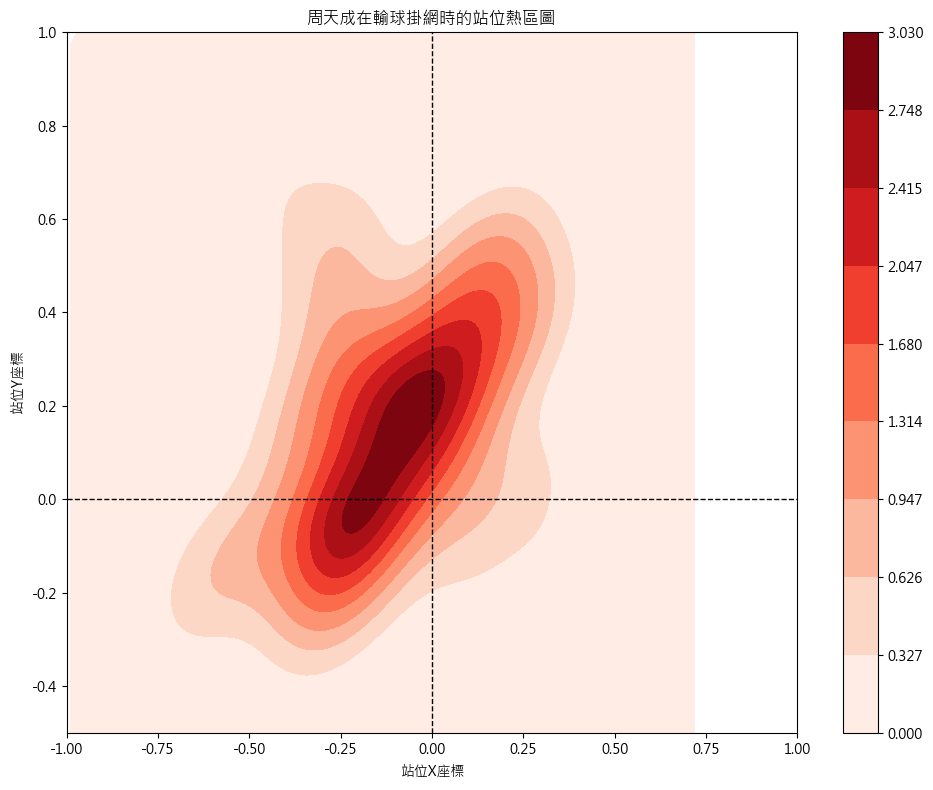

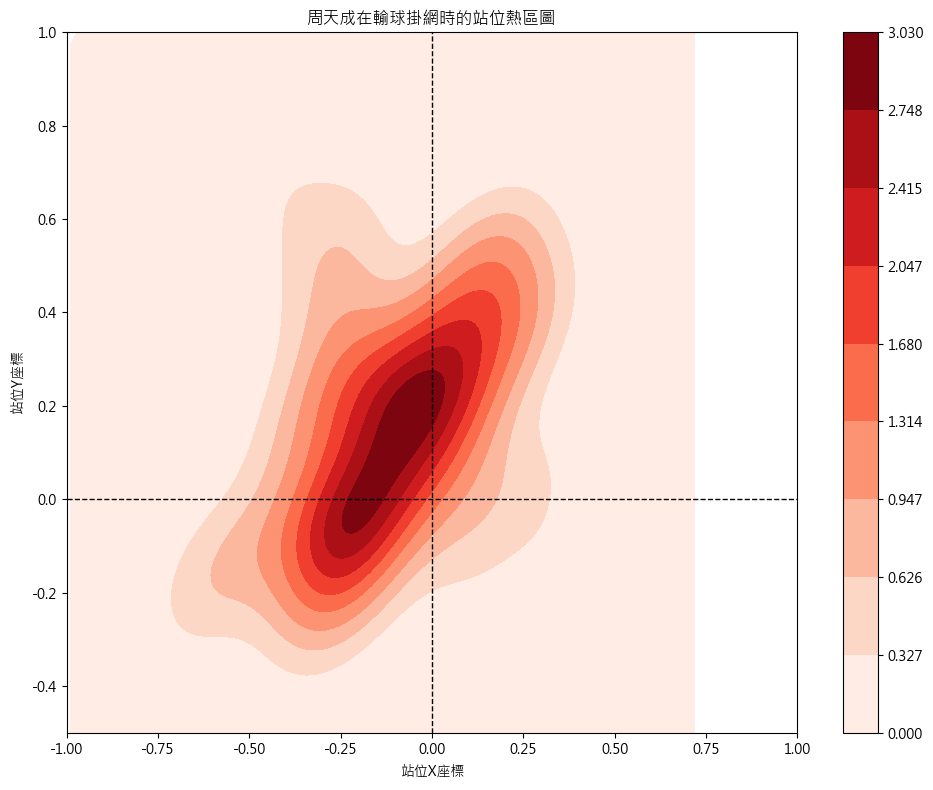

In [29]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設置，確保需支援中文顯示
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 數據篩選：周天成且輸球原因為"掛網"
filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '掛網')]

# 2. 確認數據存在
if len(filtered_df) > 0:
    # 3. 繪製熱圖
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=filtered_df, x='player_location_x', y='player_location_y', cmap="Reds", fill=True, thresh=0, cbar=True)
    
    # 圖表標籤
    plt.title('周天成在輸球掛網時的站位熱區圖')
    plt.xlabel('站位X座標')
    plt.ylabel('站位Y座標')
    plt.xlim(-1, 1)  # 設定合理的x範圍
    plt.ylim(-0.5, 1)  # 設定合理的y範圍
    plt.axhline(0, color='black', linewidth=1, linestyle='--')  # 添加網線
    plt.axvline(0, color='black', linewidth=1, linestyle='--')  # 添加中線
    
    plt.tight_layout()
    fig = plt.gcf()
else:
    print("沒有符合條件的數據，無法繪製熱圖。")

# 輸出圖形物件
fig

第26題(Wrong-自己應該是opponent_score)
分析周天成在開局（自己0-5 分）、中局（自己5-18 分）和關鍵分（自己18 分以上）三個比分階段中，他自己移動距離的差異。

移動距離分數階段分析:
           mean       std  count
比分階段                           
中局    0.325993  0.208961   1632
開局    0.319930  0.217673    768
關鍵分   0.290708  0.200420    209
Figure(1000x600)


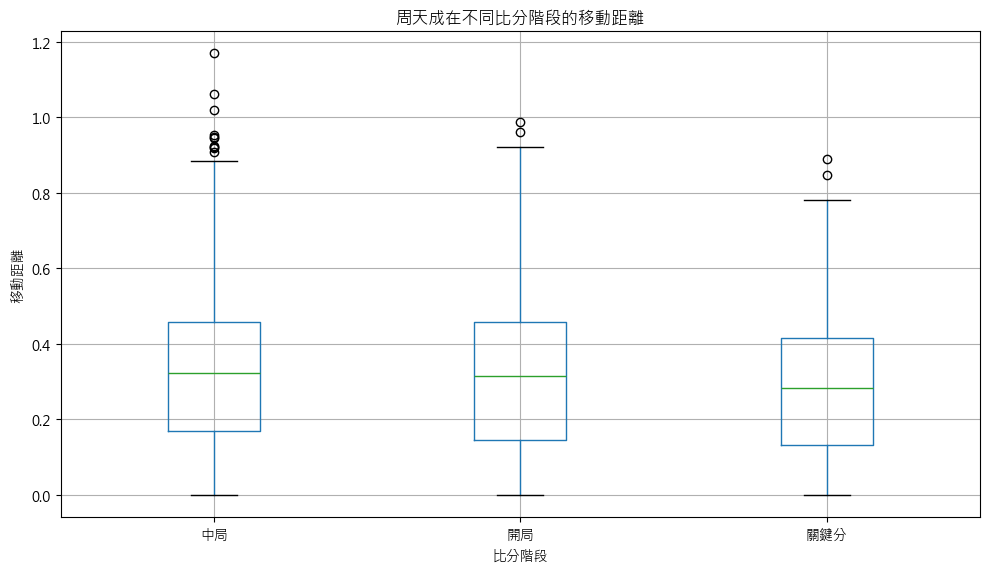

In [30]:
import platform
import matplotlib.pyplot as plt
import numpy as np

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 數據檢查
if len(df) == 0:
    raise ValueError("DataFrame is empty")

# 2. 計算移動距離 (僅限於角色是周天成)
df['移動距離'] = np.sqrt((df['player_move_x'])**2 + (df['player_move_y'])**2)

# 3. 定義比分階段
def score_stage(row):
    if 0 <= row['player_score'] <= 5:
        return '開局'
    elif 5 < row['player_score'] <= 18:
        return '中局'
    elif row['player_score'] > 18:
        return '關鍵分'
    else:
        return None

df['比分階段'] = df.apply(score_stage, axis=1)

# 4. 過濾出周天成的數據
chou_df = df[df['player'] == 'CHOU Tien Chen'].dropna(subset=['移動距離', '比分階段'])

# 5. 分析比不同分階段的移動距離
results = chou_df.groupby('比分階段')['移動距離'].agg(['mean', 'std', 'count'])
print("移動距離分數階段分析:\n", results)

# 6. 視覺化
fig, ax = plt.subplots(figsize=(10, 6))
chou_df.boxplot(column='移動距離', by='比分階段', ax=ax)
ax.set_title("周天成在不同比分階段的移動距離")
ax.set_xlabel("比分階段")
ax.set_ylabel("移動距離")
plt.suptitle("")  # Remove default suptitle to keep it clean
plt.tight_layout()

print(fig)

第27題(OK)
當對手使用「殺球」攻擊周天成時，周天成回球的失誤率是多少？

In [31]:
import pandas as pd

# 計算失誤對比總回球次數的比例
def calculate_fault_rate(df):
    if len(df) == 0:
        return "No data available"

    # 準備對應的前拍資訊，用shift
    df['prev_player'] = df.groupby(['match_id', 'set', 'rally'])['player'].shift(1)
    df['prev_type'] = df.groupby(['match_id', 'set', 'rally'])['type'].shift(1)
    
    # 篩選出前拍為對手的殺球，即周天成回球的球
    chou_face_smash = df[(df['prev_type'] == '殺球') & (df['prev_player'] != 'CHOU Tien Chen')]
    
    # 總的回球次數
    total_returns = len(chou_face_smash)

    # 計算失誤次數
    error_returns = len(chou_face_smash[(chou_face_smash['player'] == 'CHOU Tien Chen') & 
                                        (~chou_face_smash['lose_reason'].isna())])

    # 計算失誤率
    if total_returns > 0:
        error_rate = error_returns / total_returns
    else:
        error_rate = float('nan')

    print(f"失誤次數: {error_returns}, 總回球次數: {total_returns}, 失誤率: {error_rate:.2%}")

# 執行計算
calculate_fault_rate(df)

失誤次數: 33, 總回球次數: 250, 失誤率: 13.20%


第28題(OK)
分析周天成在開局（他0-5 分）、中局（他5-18 分）和關鍵分（他18 分以上）三個比分階段中，每回合與對手來回的球數的差異

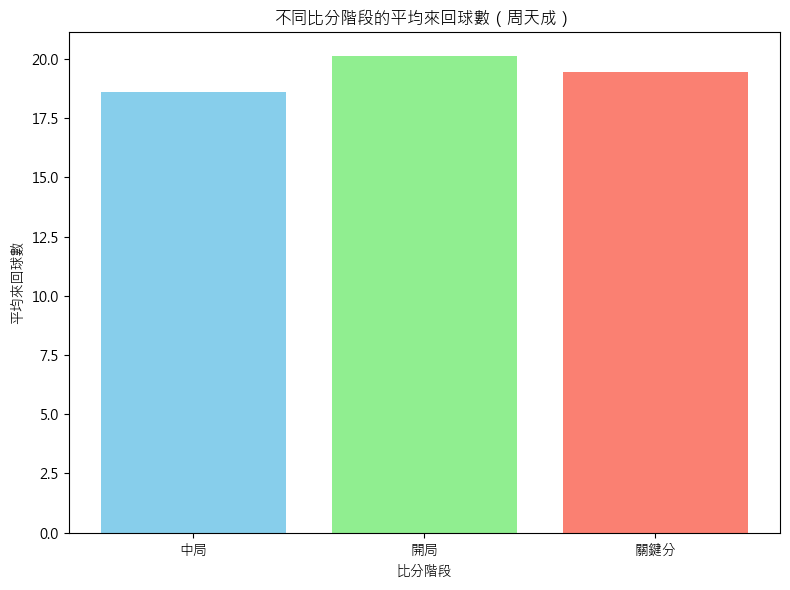

In [32]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據長度
if len(df) > 0:
    # 添加得分階段
    def score_phase(row):
        if row['opponent_score'] <= 5:
            return '開局'
        elif row['opponent_score'] <= 18:
            return '中局'
        else:
            return '關鍵分'

    df['score_phase'] = df.apply(score_phase, axis=1)

    # 計算每個回合的最大 ball_round
    rally_max_ball_round = df.groupby(['match_id', 'set', 'rally'])['ball_round'].max().reset_index()
    rally_max_ball_round = rally_max_ball_round.rename(columns={'ball_round': 'max_ball_round'})

    # 合併比分階段資訊
    df = pd.merge(df, rally_max_ball_round, on=['match_id', 'set', 'rally'])

    # 只取周天成打球的數據
    chou_data = df[df['player'] == 'CHOU Tien Chen']

    # 各比分階段的平均來回球數
    score_phase_avg = df.groupby('score_phase')['max_ball_round'].mean().reset_index()

    # 繪製比較圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(score_phase_avg['score_phase'], score_phase_avg['max_ball_round'], color=['skyblue', 'lightgreen', 'salmon'])

    # 添加標籤
    ax.set_title('不同比分階段的平均來回球數（周天成）')
    ax.set_xlabel('比分階段')
    ax.set_ylabel('平均來回球數')

    plt.tight_layout()
    plt.savefig('score_phase_comparison.png')  # 可選：儲存圖像
else:
    print("數據框為空。")

第29題
當周天成打擊出界時，劃出站點的散佈圖?

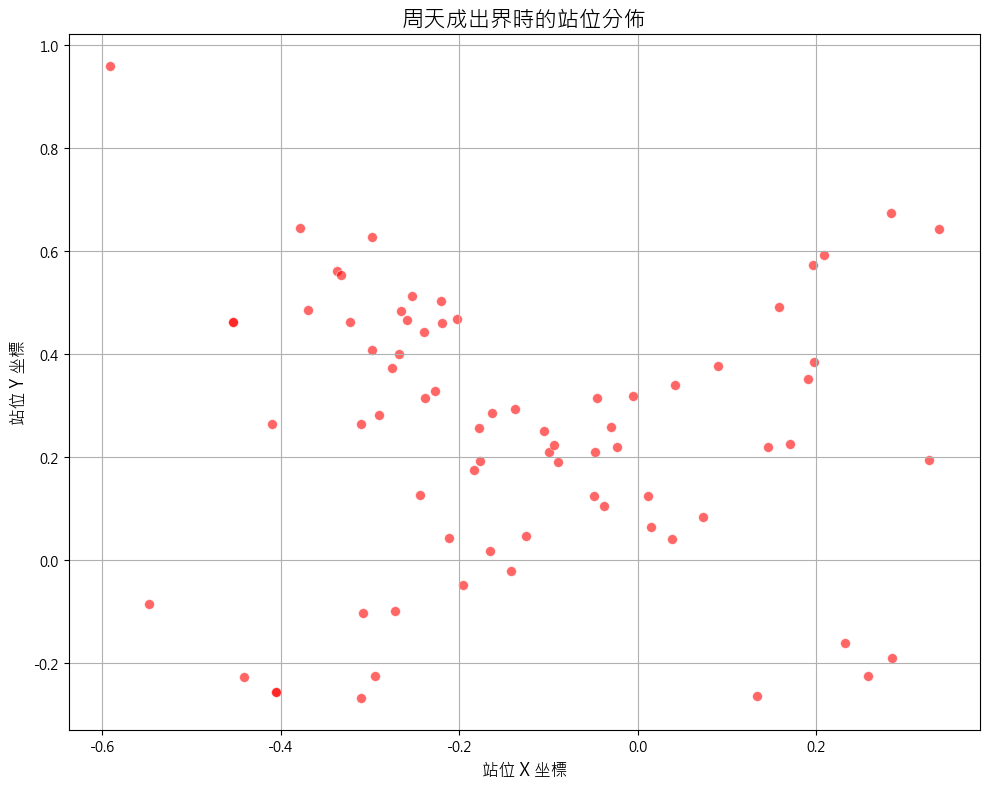

In [33]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集是否有數據
if len(df) > 0:
    # 篩選周天成打擊且失分原因為 "出界" 的記錄
    out_of_bound_df = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '出界')]
    
    # 繪製站位散佈圖
    if len(out_of_bound_df) > 0:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.scatterplot(data=out_of_bound_df, x='player_location_x', y='player_location_y', alpha=0.6, s=50, color='red', ax=ax)
        ax.set_title('周天成出界時的站位分佈', fontsize=16)
        ax.set_xlabel('站位 X 坐標', fontsize=12)
        ax.set_ylabel('站位 Y 坐標', fontsize=12)
        ax.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print('沒有關於周天成的出界記錄。')

第30題
周天成打擊出界失誤，該球的落點分布

周天成出界失誤的總數: 74


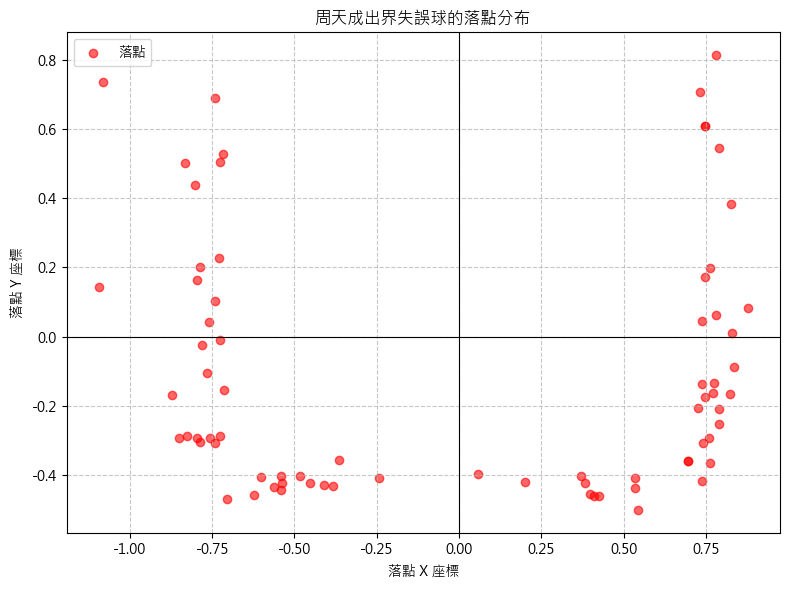

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 設置字體
import platform
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據量大於0
if len(df) > 0:
    # 篩選周天成的出界失誤數據
    chou_out_df = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '出界')]

    # 檢查篩選後的數據量
    if len(chou_out_df) > 0:
        print(f"周天成出界失誤的總數: {len(chou_out_df)}")

        # 繪製落點分布圖
        plt.figure(figsize=(8, 6))
        plt.scatter(chou_out_df['landing_x'], chou_out_df['landing_y'], c='red', alpha=0.6, label='落點')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.title('周天成出界失誤球的落點分布')
        plt.axhline(0, color='black', linewidth=0.8)
        plt.axvline(0, color='black', linewidth=0.8)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()

        # 確保落點分布圖準備好
        fig = plt.gcf()
    else:
        print("沒有周天成的出界失誤數據。")
else:
    print("數據集為空。")

第31題(大致OK)
在第一場次的比賽中，隨著局數的推進，周天成的「殺球」使用頻率和得分率是否出現了顯著的下滑

周天成的殺球頻率： set
1    0.061776
2    0.046667
3    0.048193
Name: rally_id, dtype: float64
周天成的殺球得分率： set
1    0.125000
2    0.333333
3    0.142857
Name: rally_id, dtype: float64
     殺球次數  殺球得分次數      殺球頻率     殺球得分率
set                                  
1      32       4  0.061776  0.125000
2      21       7  0.046667  0.333333
3      28       4  0.048193  0.142857
卡方檢定結果：chi2 = 1.4245242419371635 , p-value = 0.4905332957835211


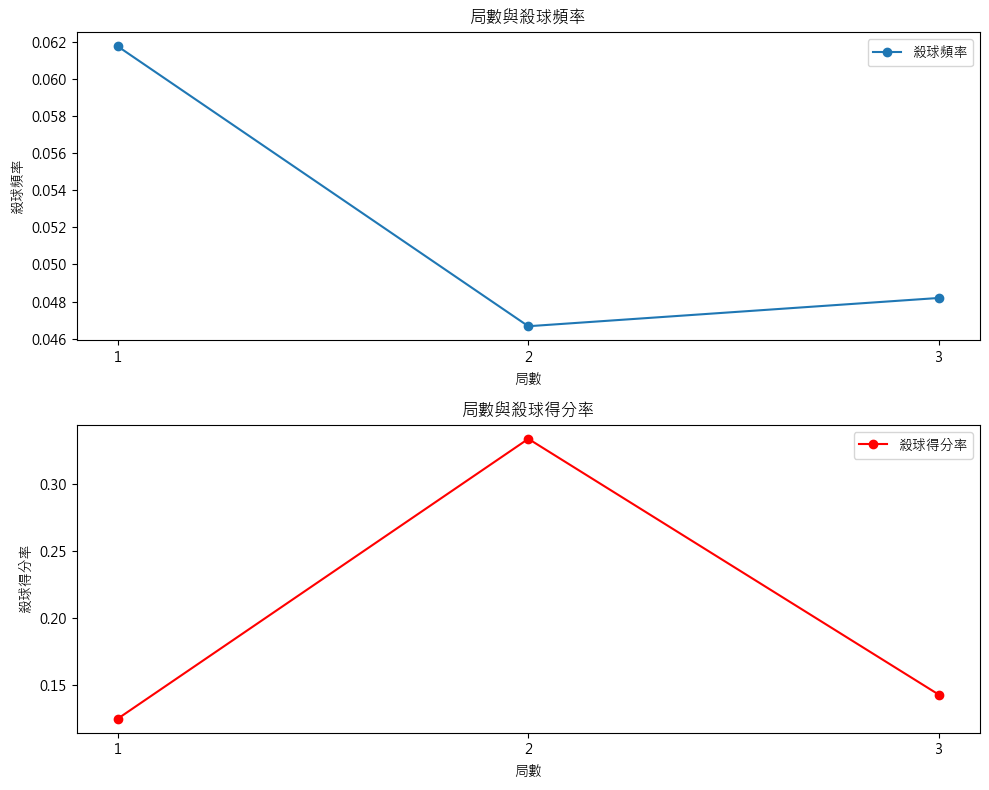

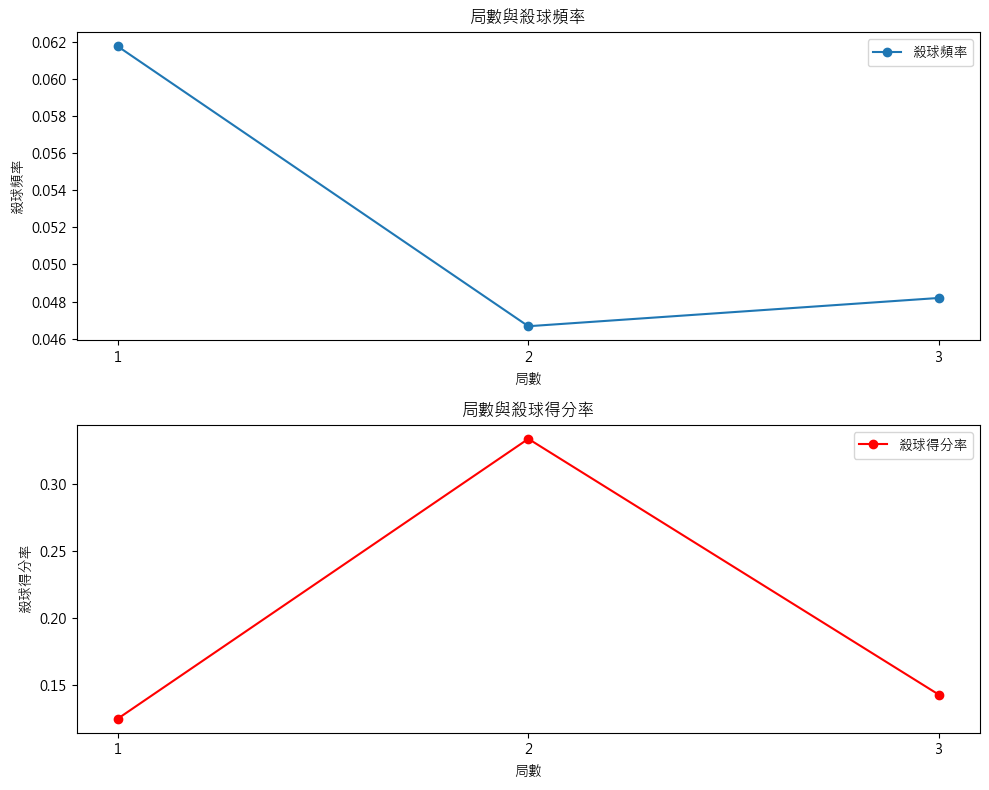

In [35]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 過濾出 match_id 為 1 的比賽
match1_df = df[df['match_id'] == 1]

# 計算每一局的總擊球次數
total_shots_per_set = match1_df.groupby('set')['rally_id'].count()

# 計算每一局周天成的殺球次數和殺球得分次數
chou_smash_count = match1_df[(match1_df['player'] == 'CHOU Tien Chen') & (match1_df['type'] == '殺球')].groupby('set')['rally_id'].count()
chou_smash_win_count = match1_df[(match1_df['player'] == 'CHOU Tien Chen') & (match1_df['type'] == '殺球') & (match1_df['player'] == match1_df['getpoint_player'])].groupby('set')['rally_id'].count()

# 計算殺球頻率和得分率
chou_smash_frequency = chou_smash_count / total_shots_per_set
chou_smash_win_rate = chou_smash_win_count / chou_smash_count

# 打印結果
print("周天成的殺球頻率：", chou_smash_frequency)
print("周天成的殺球得分率：", chou_smash_win_rate)

# 以表格形式呈現
chou_data = pd.DataFrame({
    '殺球次數': chou_smash_count,
    '殺球得分次數': chou_smash_win_count,
    '殺球頻率': chou_smash_frequency,
    '殺球得分率': chou_smash_win_rate
}, index=chou_smash_count.index)

print(chou_data)

# 統計檢定 (卡方檢定) - 用於檢查殺球次數隨局數推進的顯著性
contingency_table = [chou_smash_count.values, total_shots_per_set.values - chou_smash_count.values]
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("卡方檢定結果：chi2 =", chi2, ", p-value =", p)

# 繪圖
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# 杀球频率
ax[0].plot(chou_smash_frequency.index, chou_smash_frequency, marker='o', linestyle='-', label='殺球頻率')
ax[0].set_title('局數與殺球頻率')
ax[0].set_xlabel('局數')
ax[0].set_ylabel('殺球頻率')
ax[0].set_xticks(range(min(chou_smash_frequency.index), max(chou_smash_frequency.index) + 1))
ax[0].legend()

# 杀球得分率
ax[1].plot(chou_smash_win_rate.index, chou_smash_win_rate, marker='o', linestyle='-', label='殺球得分率', color='r')
ax[1].set_title('局數與殺球得分率')
ax[1].set_xlabel('局數')
ax[1].set_ylabel('殺球得分率')
ax[1].set_xticks(range(min(chou_smash_win_rate.index), max(chou_smash_win_rate.index) + 1))
ax[1].legend()

plt.tight_layout()

# 最終結果
fig

第32題(OK)
周天成使用殺球的前一拍，對手都用什麼球種，畫出圓餅圖

C:\Users\Danie\AppData\Local\Temp\ipykernel_604\362665942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_smash['opponent_previous_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(1)


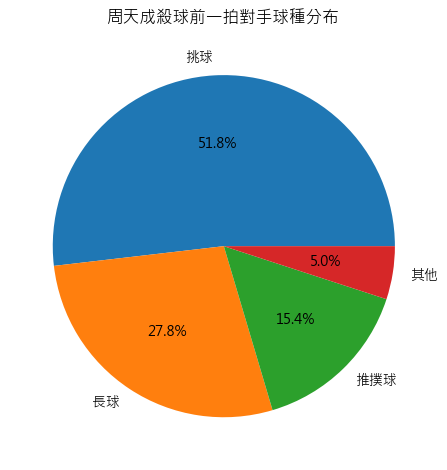

In [36]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 擷取殺球前一拍的對手球種
# 過濾周天成的殺球數據
filter_smash = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

# 獲得殺球前一拍的對手球種
filter_smash['opponent_previous_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(1)

# 確保擷取有效數據
valid_shots = filter_smash.dropna(subset=['opponent_previous_type'])

# 計算對手使用球種的分布
opponent_shot_distribution = valid_shots['opponent_previous_type'].value_counts()

# 球種名稱對照
shot_types = {
    1.0: '發短球', 
    2.0: '發長球', 
    3.0: '長球', 
    4.0: '殺球', 
    5.0: '切球', 
    6.0: '挑球', 
    7.0: '平球', 
    8.0: '網前球', 
    9.0: '推撲球', 
    10.0: '接殺防守', 
    11.0: '接不到'
}

# 將數字轉換為名稱
opponent_shot_distribution.index = opponent_shot_distribution.index.map(shot_types)

# 合併小於 5% 的類別為「其他 (Others)」
threshold = 0.05 * opponent_shot_distribution.sum()
others = opponent_shot_distribution[opponent_shot_distribution < threshold].sum()
opponent_shot_distribution = opponent_shot_distribution[opponent_shot_distribution >= threshold]
opponent_shot_distribution['其他'] = others

# 繪製圓餅圖
fig, ax = plt.subplots()
ax.pie(opponent_shot_distribution, labels=opponent_shot_distribution.index, autopct='%1.1f%%')
ax.set_title('周天成殺球前一拍對手球種分布')

plt.tight_layout()

第33題(wrong)
在被對手四角拉吊得回合下，周天成勝率是多少？四角拉吊定義:(同一個球員在場區[1, 4, 21, 24]內跑動，擊球點從其中一角跑到另一角)

In [37]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經存在
if len(df) > 0:
    # 找出符合四角拉吊的回合
    def is_corner_play(group):
        corners = {1, 4, 21, 24}
        # 找到每個rally中，每個球員的location_area
        player_positions = group['player_location_area'].unique()
        # 檢查是否涵蓋四個角中任意兩個以上
        return len(corners.intersection(player_positions)) > 1
    
    corner_plays = df.groupby(['match_id', 'set', 'rally']).filter(is_corner_play)

    # 確認在corner_plays中周天成得分的回合
    chou_winning_plays = corner_plays[(corner_plays['getpoint_player'] == 'CHOU Tien Chen') & 
                                      (corner_plays['player'] == 'CHOU Tien Chen')]
    
    # 總符合條件的回合數
    total_corner_rallies = corner_plays.groupby(['match_id', 'set', 'rally']).ngroups
    # 周天成贏的回合數
    chou_winning_rallies = chou_winning_plays.groupby(['match_id', 'set', 'rally']).ngroups

    # 若總回合數為 0，直接設定勝率為 0 防止除以0錯誤
    if total_corner_rallies > 0:
        chou_win_rate = chou_winning_rallies / total_corner_rallies
    else:
        chou_win_rate = 0

    print(f"周天成在對手進行四角拉吊戰術中勝率為: {chou_win_rate:.2%}")

else:
    print("數據集中沒有可用的比賽數據。")

周天成在對手進行四角拉吊戰術中勝率為: 0.00%


第34題(大致OK)
在被對手四角拉吊得回合下，周天成的失誤原因，繪製圓餅圖，四角拉吊定義:(同一個球員在場區[1, 4, 21, 24]內跑動，擊球點從其中一角跑到另一角)

In [40]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經存在且有數據
if len(df) > 0:
    # 找出 CHOU Tien Chen 在四角區域 [1, 4, 21, 24] 移動的回合
    # 定義四角移動
    corner_areas = {1, 4, 21, 24}

    # 篩選出CHOU Tien Chen 打球並且失分的所有回合
    df_chou = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] != 'CHOU Tien Chen')]

    # 標記周天成在四角區域跑動的回合
    def is_corner_move(areas):
        areas = list(areas)
        for i in range(len(areas) - 1):
            if areas[i] in corner_areas and areas[i+1] in corner_areas and areas[i] != areas[i+1]:
                return True
        return False

    df_chou['is_corner_move'] = df_chou.groupby(['match_id', 'set', 'rally'])['player_location_area'].transform(is_corner_move)

    # 篩選出在四角拉吊的回合
    df_chou_corner = df_chou[df_chou['is_corner_move']]

    # 分析在這些回合中周天成的失誤原因
    lose_reasons = df_chou_corner['lose_reason'].value_counts()

    # 繪製圓餅圖
    if not lose_reasons.empty:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.pie(lose_reasons, labels=lose_reasons.index, autopct='%1.1f%%', startangle=90, counterclock=False)
        ax.set_title('周天成在四角拉吊中的失誤原因')
        plt.tight_layout()
    else:
        print("沒有符合條件的失誤原因數據。")

else:
    print("數據框 'df' 沒有數據。")

# 打印失誤原因數據便於檢查
print(lose_reasons)

沒有符合條件的失誤原因數據。
Series([], Name: count, dtype: int64)


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\3126725895.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chou['is_corner_move'] = df_chou.groupby(['match_id', 'set', 'rally'])['player_location_area'].transform(is_corner_move)


第35題(大致OK)
分析周天成在開局（自己0-5 分）、中局（自己10-15 分）和關鍵分（自己18 分以上）三個比分階中，他的「殺球」使用比例以及得分率，是否有顯著變化？

開局：殺球使用比例 = 0.11201866977829639 得分率 = 0.25
中局：殺球使用比例 = 0.12211668928086838 得分率 = 0.18888888888888888
關鍵分：殺球使用比例 = 0.11538461538461539 得分率 = 0.19047619047619047


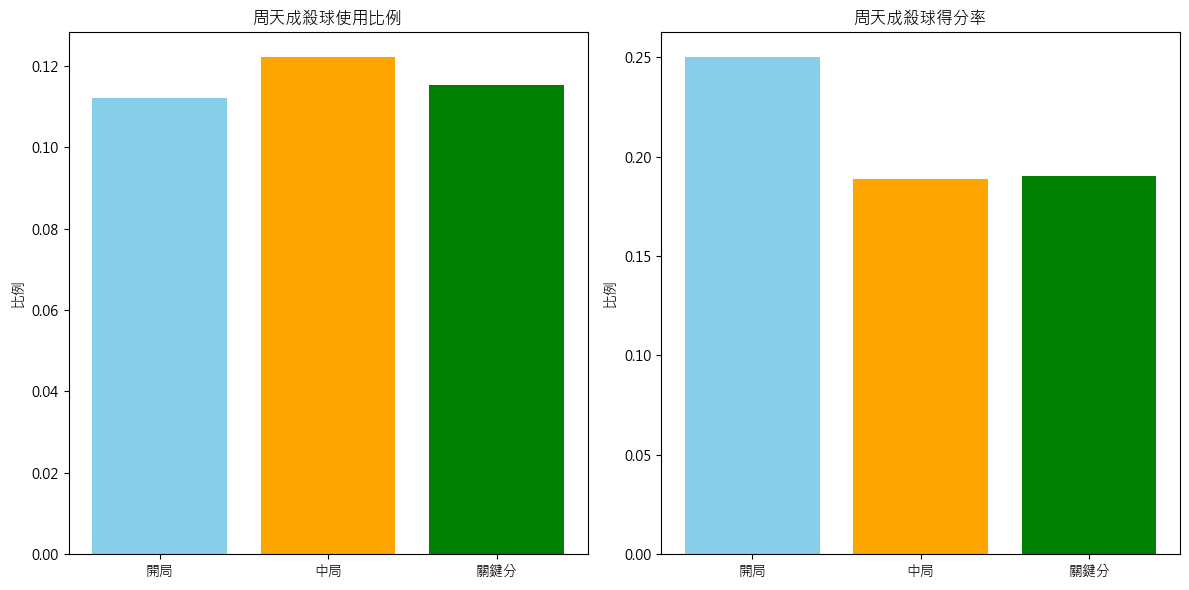

In [41]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集不為空
if len(df) > 0:
    # 篩選周天成數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義階段函數
    def analyze_stage(stage_df, stage_name):
        # 殺球使用比例
        smash_usage_ratio = (stage_df['type'] == '殺球').mean()
        # 殺球得分率：在殺球并得分的條件下，分母是所有的殺球數
        smash_win_ratio = stage_df[(stage_df['type'] == '殺球') & (stage_df['player'] == stage_df['getpoint_player'])].shape[0] / stage_df[stage_df['type'] == '殺球'].shape[0] if stage_df[stage_df['type'] == '殺球'].shape[0] > 0 else np.nan
        return smash_usage_ratio, smash_win_ratio

    # 開局 (0-5)
    opening_df = chou_df[chou_df['opponent_score'] <= 5]
    opening_smash_usage_ratio, opening_smash_win_ratio = analyze_stage(opening_df, '開局')

    # 中局 (10-15)
    mid_df = chou_df[(chou_df['opponent_score'] >= 10) & (chou_df['opponent_score'] <= 15)]
    mid_smash_usage_ratio, mid_smash_win_ratio = analyze_stage(mid_df, '中局')

    # 關鍵分 (18+)
    critical_df = chou_df[chou_df['opponent_score'] >= 18]
    critical_smash_usage_ratio, critical_smash_win_ratio = analyze_stage(critical_df, '關鍵分')
    
    # 打印結果
    print("開局：殺球使用比例 =", opening_smash_usage_ratio, "得分率 =", opening_smash_win_ratio)
    print("中局：殺球使用比例 =", mid_smash_usage_ratio, "得分率 =", mid_smash_win_ratio)
    print("關鍵分：殺球使用比例 =", critical_smash_usage_ratio, "得分率 =", critical_smash_win_ratio)

    # 可視化: 殺球使用比例和得分率
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    stages = ['開局', '中局', '關鍵分']
    smash_usage_ratios = [opening_smash_usage_ratio, mid_smash_usage_ratio, critical_smash_usage_ratio]
    smash_win_ratios = [opening_smash_win_ratio, mid_smash_win_ratio, critical_smash_win_ratio]

    ax1.bar(stages, smash_usage_ratios, color=['skyblue', 'orange', 'green'])
    ax1.set_title('周天成殺球使用比例')
    ax1.set_ylabel('比例')

    ax2.bar(stages, smash_win_ratios, color=['skyblue', 'orange', 'green'])
    ax2.set_title('周天成殺球得分率')
    ax2.set_ylabel('比例')
    
    plt.tight_layout()
    plt.show()
else:
    print("數據集為空，無法進行分析。")

第36題(OK)
計算周天成在落後 3 分以上時，平均每個回合的擊球次數，並與比分膠著時的回合平均擊球次數進行比較。

In [42]:
import platform
import matplotlib.pyplot as plt

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 驗證數據有效
if len(df) > 0:
    # 計算每個回合的擊球數
    rally_shots = df.groupby(['match_id', 'set', 'rally'])['ball_round'].max().reset_index(name='num_shots')

    # Join rally_shots back to the original dataframe to get the score_status for each rally
    df_rallies = df.drop_duplicates(subset=['match_id', 'set', 'rally'])[['match_id', 'set', 'rally', 'score_status']].merge(rally_shots, on=['match_id', 'set', 'rally'])

    # 過濾出周天成落後超過3分的回合
    chou_behind_df = df_rallies[df_rallies['score_status'] > 3]
    avg_shots_chou_behind = chou_behind_df['num_shots'].mean()

    # 過濾出比分膠著 (分數差距不超過1分) 的回合
    close_score_df = df_rallies[df_rallies['score_status'].abs() <= 1]
    avg_shots_close_score = close_score_df['num_shots'].mean()

    # 打印結果
    print(f"周天成落後超過3分的回合平均擊球次數: {avg_shots_chou_behind}")
    print(f"比分膠著（雙方比分差距不超過1分）回合平均擊球次數: {avg_shots_close_score}")

周天成落後超過3分的回合平均擊球次數: 12.41025641025641
比分膠著（雙方比分差距不超過1分）回合平均擊球次數: 12.458333333333334


第37題(OK)
幫我統整周天成（CHOU Tien Chen）的得分戰術組合(例如:最常見的是，他切球，對手挑球，他殺球得分)，並列出前五名

In [43]:
import pandas as pd

# 假設 `df` 已經被正確地載入，不需要重新讀取數據
# 設定正確的字體 (這步驟省略)

# 確保數據完整性
if len(df) == 0:
    print("數據集為空，無法進行分析")
else:
    # 選取周天成得分的情況
    chou_win_points = df[(df['getpoint_player'] == 'CHOU Tien Chen') & (df['player'] == 'CHOU Tien Chen')]

    # 計算並獲取得分前的兩次球拍類型
    chou_sorted = df.sort_values(['match_id', 'set', 'rally', 'ball_round'])

    # Shift to get previous shot types
    chou_sorted['type_prev_1'] = chou_sorted.groupby(['match_id', 'set', 'rally'])['type'].shift(1)
    chou_sorted['type_prev_2'] = chou_sorted.groupby(['match_id', 'set', 'rally'])['type'].shift(2)

    # 篩選出周天成擊球並且得分的記錄
    chou_points = chou_sorted[(chou_sorted['getpoint_player'] == 'CHOU Tien Chen') & (chou_sorted['player'] == 'CHOU Tien Chen')]
    
    # 統計戰術組合
    chou_points['tactical_combination'] = chou_points['type_prev_2'] + ' -> ' + chou_points['type_prev_1'] + ' -> ' + chou_points['type']
    tactic_counts = chou_points['tactical_combination'].value_counts().head(5)
    
    # 打印最常見的前五名戰術組合
    print("周天成比賽中最常見的前五名得分戰術組合:")
    print(tactic_counts)

周天成比賽中最常見的前五名得分戰術組合:
tactical_combination
網前球 -> 挑球 -> 殺球     22
推撲球 -> 長球 -> 殺球     10
挑球 -> 長球 -> 殺球       7
長球 -> 長球 -> 殺球       4
網前球 -> 推撲球 -> 殺球     4
Name: count, dtype: int64


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\376376015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_points['tactical_combination'] = chou_points['type_prev_2'] + ' -> ' + chou_points['type_prev_1'] + ' -> ' + chou_points['type']


第38題(OK)
統整周天成每個場次中各局的表現(例如，球種變化、殺球頻與失誤率、失誤原因等等)

C:\Users\Danie\AppData\Local\Temp\ipykernel_604\456184046.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kills_count = grouped_df.apply(lambda x: (x['type'] == '殺球').sum())
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\456184046.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faults_count = grouped_df.apply(lambda x: x['lose_reason'].notna().sum())


周天成各場比賽中的數據統計：
--------------------------------------------------

每局的球種使用次數：
type          切球  平球  挑球  接殺防守  推撲球  殺球  發短球  發長球  網前球  長球
match_id set                                              
1.0      1    12  14  16    31   51  32    8    6   40  51
         2    28   7  26    40   20  21   11    5   40  27
         3    24  16  27    64   30  28    5   14   55  30
3.0      1    11   6  13    24   43  24   14    0   52  19
         2     9   6  10    25   45  26   12    0   51  15
5.0      1    13  10  39    28    2  19   10    1   40  21
         2    21   2  17    13    4  13   17    0   39  27
         3    24  10  20    22   21  21   13    0   57  14
6.0      1    10   9  36    25   12  26   13    3   60  15
         2    15   4  16    11   21  15   12    0   25  13
         3    18   5  17    16   18  19   15    0   54  11
7.0      1    16  14  27    29   35  33   12    3   43  23
         2    10   3   6    23   32  22    5    2   26   9

每局的殺球頻率 (%)：
match_id  set
1.0      

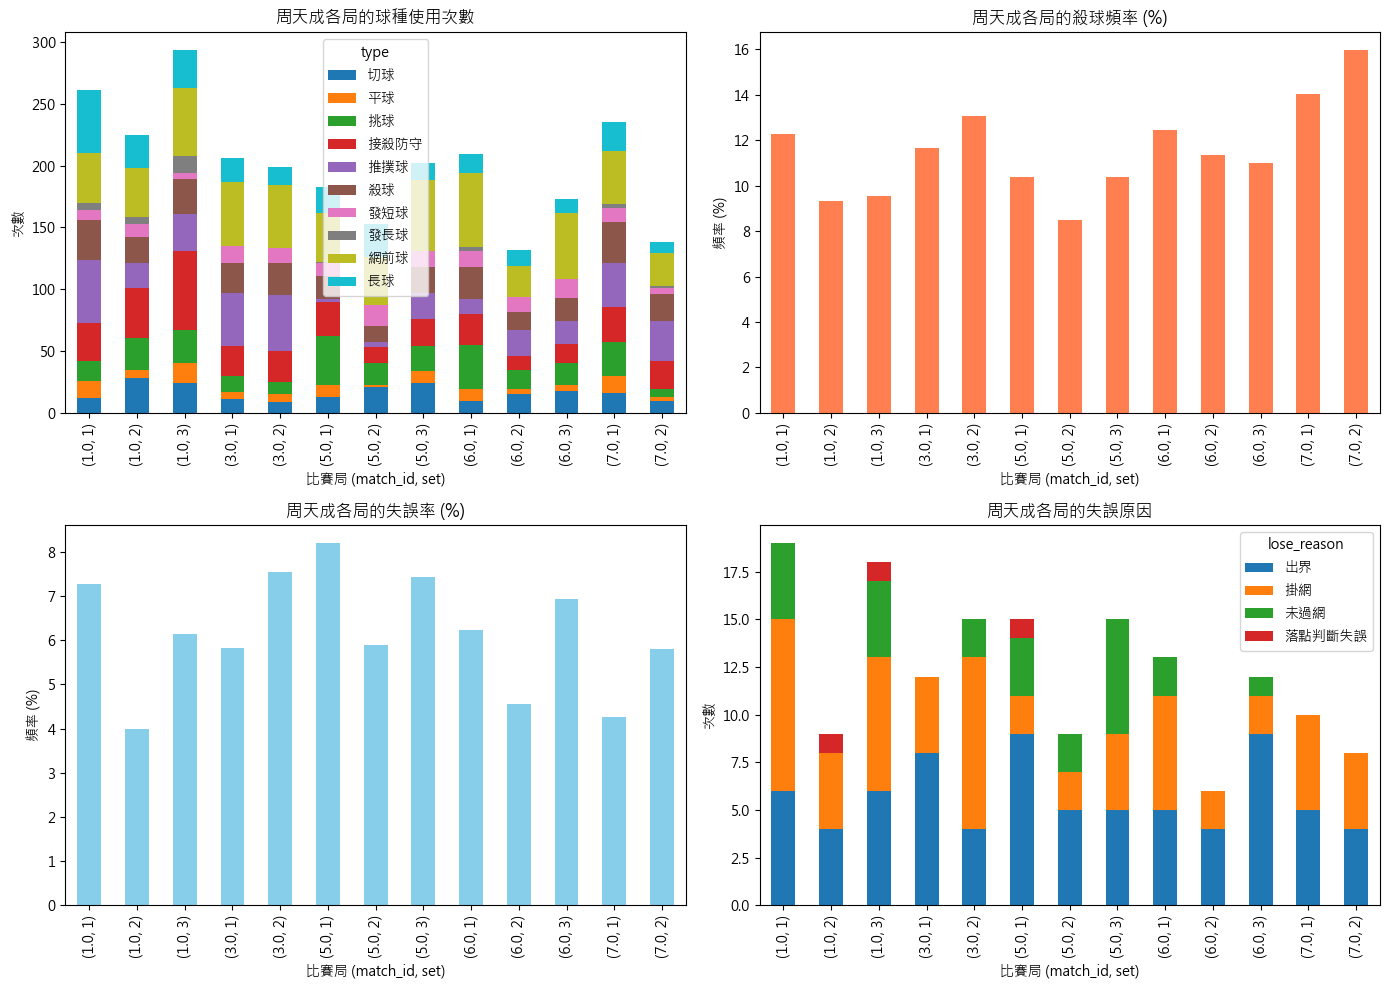

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 檢查數據長度
if len(df) > 0:
    # 篩選出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 按照 `match_id` 和 `set` 分組
    grouped_df = chou_df.groupby(['match_id', 'set'])

    # 計算每一局各球種的使用次數
    type_count = grouped_df['type'].value_counts().unstack(fill_value=0)

    # 計算殺球頻率
    kills_count = grouped_df.apply(lambda x: (x['type'] == '殺球').sum())
    total_shots = grouped_df.size()
    kill_rate = (kills_count / total_shots) * 100  # 百分比

    # 計算失誤率和失誤原因
    lose_reasons = grouped_df['lose_reason'].value_counts().unstack(fill_value=0)
    faults_count = grouped_df.apply(lambda x: x['lose_reason'].notna().sum())
    fault_rate = (faults_count / total_shots) * 100  # 百分比

    # 打印統計結果
    print("周天成各場比賽中的數據統計：")
    print("--------------------------------------------------")
    print("\n每局的球種使用次數：")
    print(type_count)
    print("\n每局的殺球頻率 (%)：")
    print(kill_rate)
    print("\n每局的失誤率 (%)：")
    print(fault_rate)
    print("\n每局的失誤原因：")
    print(lose_reasons)

    # 可視化
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    
    # 繪制各球種使用次數
    type_count.plot(kind='bar', stacked=True, ax=axes[0, 0])
    axes[0, 0].set_title('周天成各局的球種使用次數')
    axes[0, 0].set_xlabel('比賽局 (match_id, set)')
    axes[0, 0].set_ylabel('次數')
    
    # 繪制殺球頻率
    kill_rate.plot(kind='bar', color='coral', ax=axes[0, 1])
    axes[0, 1].set_title('周天成各局的殺球頻率 (%)')
    axes[0, 1].set_xlabel('比賽局 (match_id, set)')
    axes[0, 1].set_ylabel('頻率 (%)')
    
    # 繪制失誤率
    fault_rate.plot(kind='bar', color='skyblue', ax=axes[1, 0])
    axes[1, 0].set_title('周天成各局的失誤率 (%)')
    axes[1, 0].set_xlabel('比賽局 (match_id, set)')
    axes[1, 0].set_ylabel('頻率 (%)')
    
    # 繪制失誤原因
    lose_reasons.plot(kind='bar', stacked=True, ax=axes[1, 1])
    axes[1, 1].set_title('周天成各局的失誤原因')
    axes[1, 1].set_xlabel('比賽局 (match_id, set)')
    axes[1, 1].set_ylabel('次數')
    
    plt.tight_layout()
else:
    print('數據不足，無法進一步分析。')

第39題(OK)
分析周天成在不同比分階段(開局:0-5分,中局:10-15分,關鍵分:18分以上)中，使用不同球種的頻率變化趨勢

C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2547393387.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['score_phase'] = chou_df['player_score'].apply(score_phase)
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2547393387.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='count', y='type', data=phase_data, palette='viridis')
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2547393387.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effe

    score_phase  type  count
0   中局 (10-15分)    切球     68
1   中局 (10-15分)    平球     32
2   中局 (10-15分)    挑球     55
3   中局 (10-15分)  接殺防守     93
4   中局 (10-15分)   推撲球    102
5   中局 (10-15分)    殺球     90
6   中局 (10-15分)   發短球     39
7   中局 (10-15分)   發長球      8
8   中局 (10-15分)   網前球    158
9   中局 (10-15分)    長球     73
10    開局 (0-5分)    切球     64
11    開局 (0-5分)    平球     36
12    開局 (0-5分)    挑球    106
13    開局 (0-5分)  接殺防守    102
14    開局 (0-5分)   推撲球     81
15    開局 (0-5分)    殺球     83
16    開局 (0-5分)   發短球     51
17    開局 (0-5分)   發長球      9
18    開局 (0-5分)   網前球    159
19    開局 (0-5分)    長球     77
20  關鍵分 (18分以上)    切球     16
21  關鍵分 (18分以上)    平球     14
22  關鍵分 (18分以上)    挑球     18
23  關鍵分 (18分以上)  接殺防守     37
24  關鍵分 (18分以上)   推撲球     37
25  關鍵分 (18分以上)    殺球     36
26  關鍵分 (18分以上)   發短球     12
27  關鍵分 (18分以上)   發長球      6
28  關鍵分 (18分以上)   網前球     71
29  關鍵分 (18分以上)    長球     24


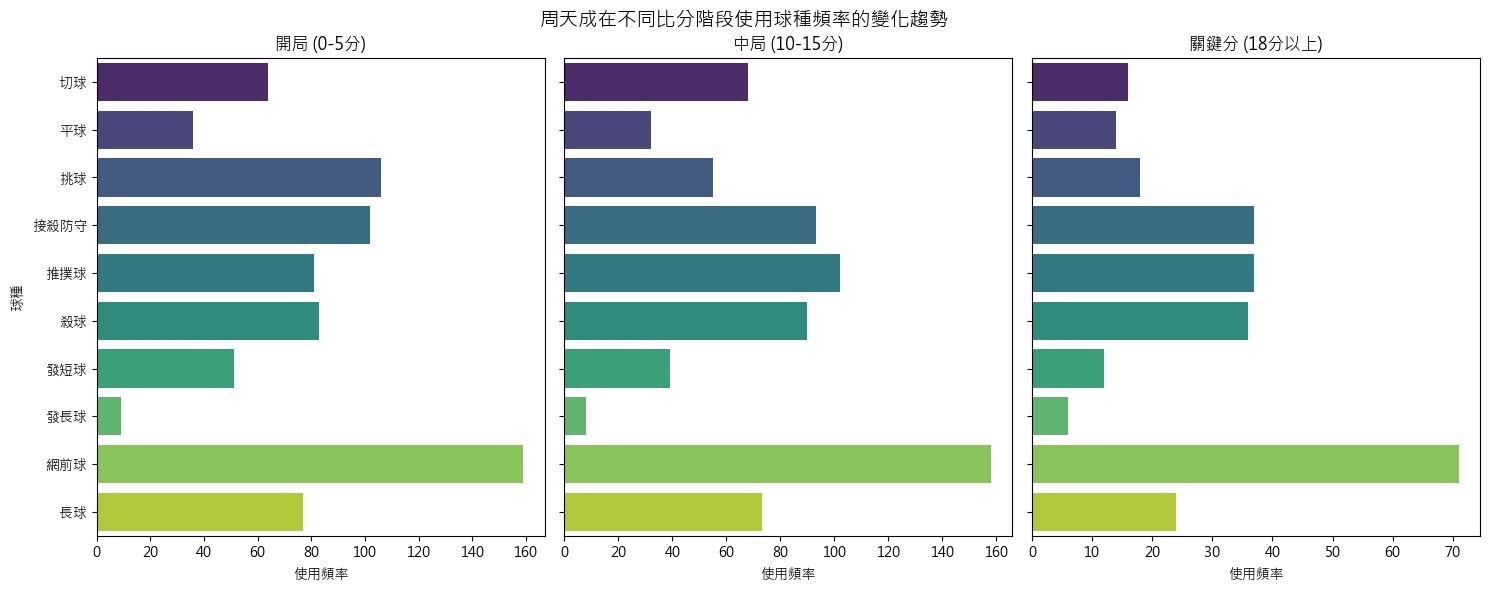

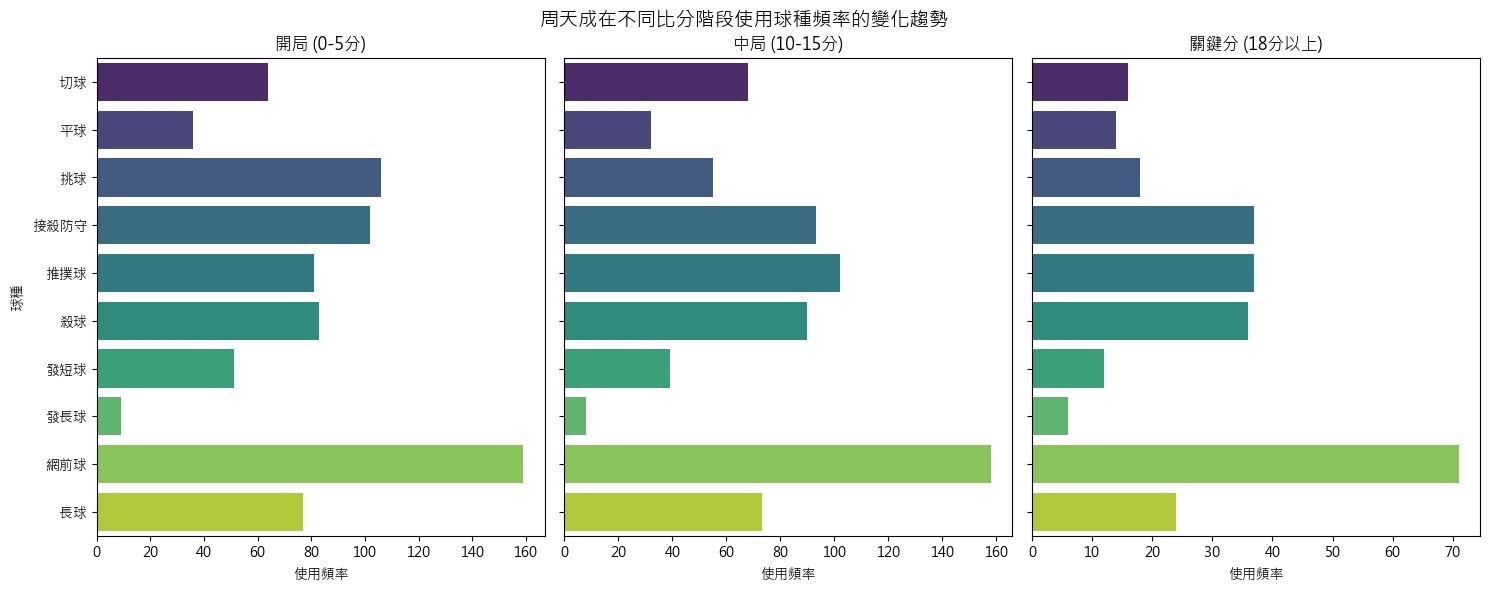

In [46]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據量
assert len(df) > 0, "DataFrame is empty!"

# 過濾出周天成的數據並去掉遺失值
chou_df = df[df['player'] == 'CHOU Tien Chen']

# 定義比分階段
def score_phase(score):
    if 0 <= score <= 5:
        return '開局 (0-5分)'
    elif 10 <= score <= 15:
        return '中局 (10-15分)'
    elif score >= 18:
        return '關鍵分 (18分以上)'
    else:
        return None

# 增加一個欄位 'score_phase' 來表示比分階段
chou_df['score_phase'] = chou_df['player_score'].apply(score_phase)

# 去除 NaN 值
chou_df = chou_df.dropna(subset=['score_phase'])

# 計算不同比分階段的球種頻率
ball_type_freq = chou_df.groupby(['score_phase', 'type']).size().reset_index(name='count')

# 繪圖
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
score_phases = ['開局 (0-5分)', '中局 (10-15分)', '關鍵分 (18分以上)']

for i, phase in enumerate(score_phases):
    phase_data = ball_type_freq[ball_type_freq['score_phase'] == phase]
    sns.barplot(ax=axes[i], x='count', y='type', data=phase_data, palette='viridis')
    axes[i].set_title(phase)
    axes[i].set_xlabel('使用頻率')
    axes[i].set_ylabel('球種')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('周天成在不同比分階段使用球種頻率的變化趨勢', fontsize=14)

# 打印詳細重要資訊
print(ball_type_freq)

fig  # 返回 fig 物件

第40題(Wrong-邏輯錯且回球品質差不一定失誤)
周天成在被對手調動到四個角落後，他在哪些角落的「回球品質」最容易下降？下降的原因?

In [ ]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保有數據
if len(df) == 0:
    raise ValueError("數據集為空，無法分析")

# 設定四個角落的區域代碼
corner_areas = [1, 4, 21, 24]

# 篩選出周天成在這些角落的數據
corner_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(corner_areas))]

# 檢查 corner_df 是否為空
if corner_df.empty:
    raise ValueError("在指定角落沒有找到周天成的數據")

# 獲取周天成被調動的情形
corner_df['opponent_landing_area'] = df.groupby(['match_id', 'set', 'rally'])['landing_area'].shift(-1)

# 分析回球品質並找出較弱的角落
# 假設 opponent_type == 11 代表回球品質下降，這需要根據實際情況確認
quality_issues = corner_df.groupby('player_location_area').apply(lambda x: (x['opponent_type'] == 11).sum())

# 打印每個角落的數據
for area in corner_areas:
    print(f"角落位置 {area} 的回球品質降級次數: {quality_issues.get(area, 0)}")

# 視覺化不同角落的回球品質降級次數
fig, ax = plt.subplots(figsize=(10, 6))
corner_labels = ['左後角', '右後角', '左前角', '右前角']
ax.bar(corner_labels, [quality_issues.get(area, 0) for area in corner_areas], color='b')

ax.set_xlabel('周天成在的角落位置')
ax.set_ylabel('回球品質降級次數')
ax.set_title('周天成在不同角落的回球品質降級次數')
plt.tight_layout()

第41題(wrong)
哪些球種組合是周天成最常使用的，反而讓對手主動攻擊？(可能是周天成連續打長球，讓對手抓時機殺球)

type_chou
推撲球     76
長球      70
挑球      54
接殺防守     7
發長球      6
殺球       2
網前球      1
平球       1
Name: count, dtype: int64


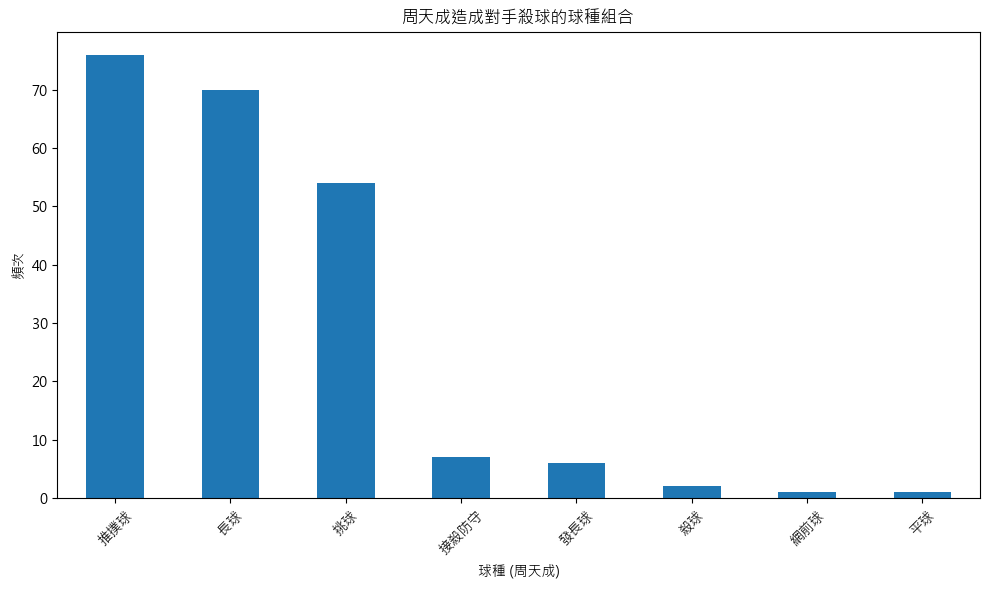

In [49]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定，確保圖表中文字顯示正確
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據框不為空
if len(df) > 0:
    # 過濾對手殺球的情況
    opponent_smash_df = df[(df['player'] == 'Kento MOMOTA') & (df['type'] == '殺球')]

    # 取得對應的周天成前一球的球種 (使用 shift(-1) 因為我們在同一個 rally 中分析的是上一拍)
    opponent_smash_df = opponent_smash_df.copy()
    opponent_smash_df['prev_opponent_type'] = opponent_smash_df.groupby(['match_id', 'set', 'rally'])['opponent_type'].shift(1)

    # 過濾周天成的數據並擁有合法的球種
    chou_ball_df = df[df['player'] == 'CHOU Tien Chen']

    # 合併這兩個表，以便能夠在分析過程中檢查周天成是否導致對手殺球
    merged_df = opponent_smash_df.merge(chou_ball_df, left_on=['match_id', 'set', 'rally', 'prev_opponent_type'],
                                        right_on=['match_id', 'set', 'rally', 'player_type'], suffixes=('_opp', '_chou'))

    # 計算球種組合頻次
    combo_counts = merged_df['type_chou'].value_counts()

    # 視覺化展示
    fig, ax = plt.subplots(figsize=(10, 6))
    combo_counts.plot(kind='bar', ax=ax)
    ax.set_title('周天成造成對手殺球的球種組合')
    ax.set_xlabel('球種 (周天成)')
    ax.set_ylabel('頻次')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 打印結果及圖表
    print(combo_counts)
    fig

第42題(OK)
哪些球種，在比賽後半段失誤率顯著上升？

前半段失誤率：
 type
切球      0.095238
平球      0.100000
挑球      0.000000
接殺防守    0.025641
推撲球     0.027027
殺球      0.102564
發短球     0.000000
發長球     0.000000
網前球     0.044444
長球      0.031250
Name: count, dtype: float64
後半段失誤率：
 type
切球      0.045455
平球      0.000000
挑球      0.000000
接殺防守    0.115385
推撲球     0.000000
殺球      0.045455
發短球     0.000000
發長球     0.000000
網前球     0.263158
長球      0.068966
Name: count, dtype: float64
失誤率變化：
 type
切球     -0.049784
平球     -0.100000
挑球      0.000000
接殺防守    0.089744
推撲球    -0.027027
殺球     -0.057110
發短球     0.000000
發長球     0.000000
網前球     0.218713
長球      0.037716
Name: count, dtype: float64
顯著上升的球種：
 type
網前球    0.218713
Name: count, dtype: float64


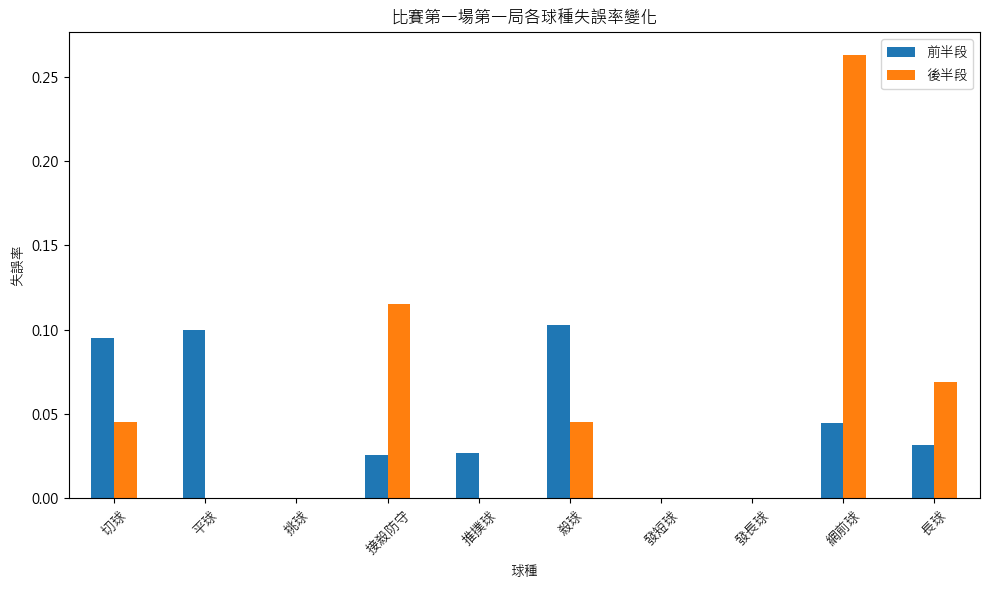

In [52]:
import pandas as pd

# 確保 `df` 存在且不為空
if len(df) > 0:
    # 篩選出第一場比賽第一局的數據
    df_match_1_set_1 = df[(df['match_id'] == 1) & (df['set'] == 1)]
    
    # 確保本局數據非空
    if len(df_match_1_set_1) > 0:
        # 定義半段的界限
        rally_half_point = 21  # example threshold for halfway point

        # 分成兩個時間段：前半段和後半段
        df_first_half = df_match_1_set_1[df_match_1_set_1['rally'] <= rally_half_point]
        df_second_half = df_match_1_set_1[df_match_1_set_1['rally'] > rally_half_point]

        # 定義函數計算失誤率
        def calculate_error_rate(df_segment):
            total_counts = df_segment['type'].value_counts()
            error_counts = df_segment[df_segment['lose_reason'].notna()]['type'].value_counts()
            error_rate = error_counts / total_counts
            return error_rate.fillna(0)

        # 計算前後半段的失誤率
        first_half_error_rate = calculate_error_rate(df_first_half)
        second_half_error_rate = calculate_error_rate(df_second_half)

        # 計算失誤率變化
        error_rate_change = second_half_error_rate - first_half_error_rate

        # 找出顯著上升的球種 (例如，失誤率變化超過指定閾值)
        significant_increase_threshold = 0.1  # 假設閾值
        significant_errors = error_rate_change[error_rate_change > significant_increase_threshold]

        # 打印計算結果
        print("前半段失誤率：\n", first_half_error_rate)
        print("後半段失誤率：\n", second_half_error_rate)
        print("失誤率變化：\n", error_rate_change)
        print("顯著上升的球種：\n", significant_errors)

        # 視覺化失誤率變化
        import platform
        import matplotlib.pyplot as plt
        
        # 字體設置
        s = platform.system()
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
        plt.rcParams['axes.unicode_minus'] = False

        fig, ax = plt.subplots(figsize=(10, 6))
        error_rate_df = pd.DataFrame({'前半段': first_half_error_rate, '後半段': second_half_error_rate}).fillna(0)
        error_rate_df.plot(kind='bar', ax=ax)
        ax.set_title('比賽第一場第一局各球種失誤率變化')
        ax.set_ylabel('失誤率')
        ax.set_xlabel('球種')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

第43題(wrong)
在被對手四角拉吊時，周天成在前後場分別常用什麼球種回擊？四角拉吊定義:(同一個球員在場區[1, 4, 21, 24]內跑動，擊球點從其中一角跑到另一角)

周天成在前場的常用回擊球種:
type
切球    1
Name: count, dtype: int64

周天成在後場的常用回擊球種:
type
推撲球    2
挑球     2
網前球    1
Name: count, dtype: int64


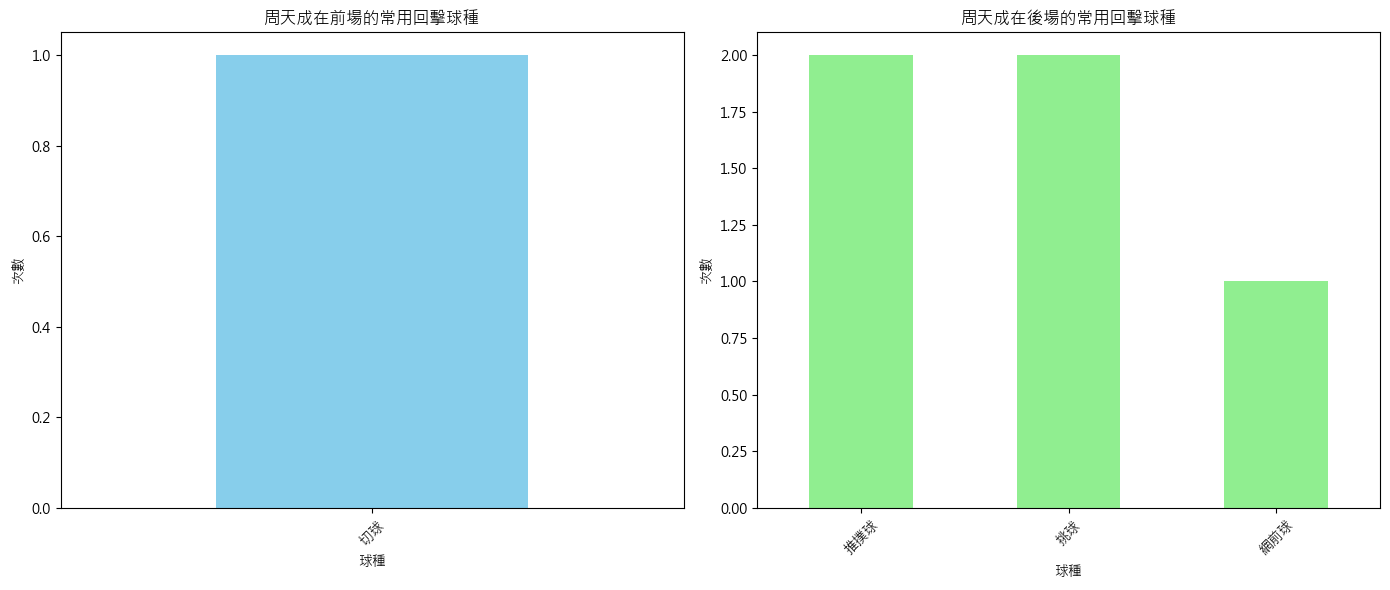

In [53]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集不為空
if len(df) == 0:
    raise ValueError("数据集为空！")

# 定義四角區域
corner_areas = [1, 4, 21, 24]

# 找到對手四角拉吊的拍數
# 需要篩選在同一對手和同一回合中移動的情況
df_shifted = df[(df['opponent_location_area'].isin(corner_areas)) & (df['player'] != 'CHOU Tien Chen')].copy()
df_shifted['next_opponent_location_area'] = df_shifted.groupby(['match_id', 'set', 'rally'])['opponent_location_area'].shift(-1)

# 判斷是否符合四角拉吊的條件
df_corner_cross = df_shifted[(df_shifted['opponent_location_area'] != df_shifted['next_opponent_location_area']) &
                             (df_shifted['next_opponent_location_area'].isin(corner_areas))]

# 選擇周天成在前場和後場的回擊
df_chou_response = df[(df['player'] == 'CHOU Tien Chen') & (df['rally_id'].isin(df_corner_cross['rally_id']))]

# 前場區域
front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
# 後場區域
back_court_areas = [1, 2, 3, 4]

# 統計周天成在前場和後場回擊的球種
front_court_responses = df_chou_response[df_chou_response['player_location_area'].isin(front_court_areas)]['type'].value_counts()
back_court_responses = df_chou_response[df_chou_response['player_location_area'].isin(back_court_areas)]['type'].value_counts()

print("周天成在前場的常用回擊球種:")
print(front_court_responses)

print("\n周天成在後場的常用回擊球種:")
print(back_court_responses)

# 視覺化結果
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
front_court_responses.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('周天成在前場的常用回擊球種')
axes[0].set_xlabel('球種')
axes[0].set_ylabel('次數')
axes[0].set_xticklabels(front_court_responses.index, rotation=45)

back_court_responses.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('周天成在後場的常用回擊球種')
axes[1].set_xlabel('球種')
axes[1].set_ylabel('次數')
axes[1].set_xticklabels(back_court_responses.index, rotation=45)

plt.tight_layout()

第44題(OK)
在關鍵分(18分以上)時，周天成採用的擊球策略與其他階段有何不同？

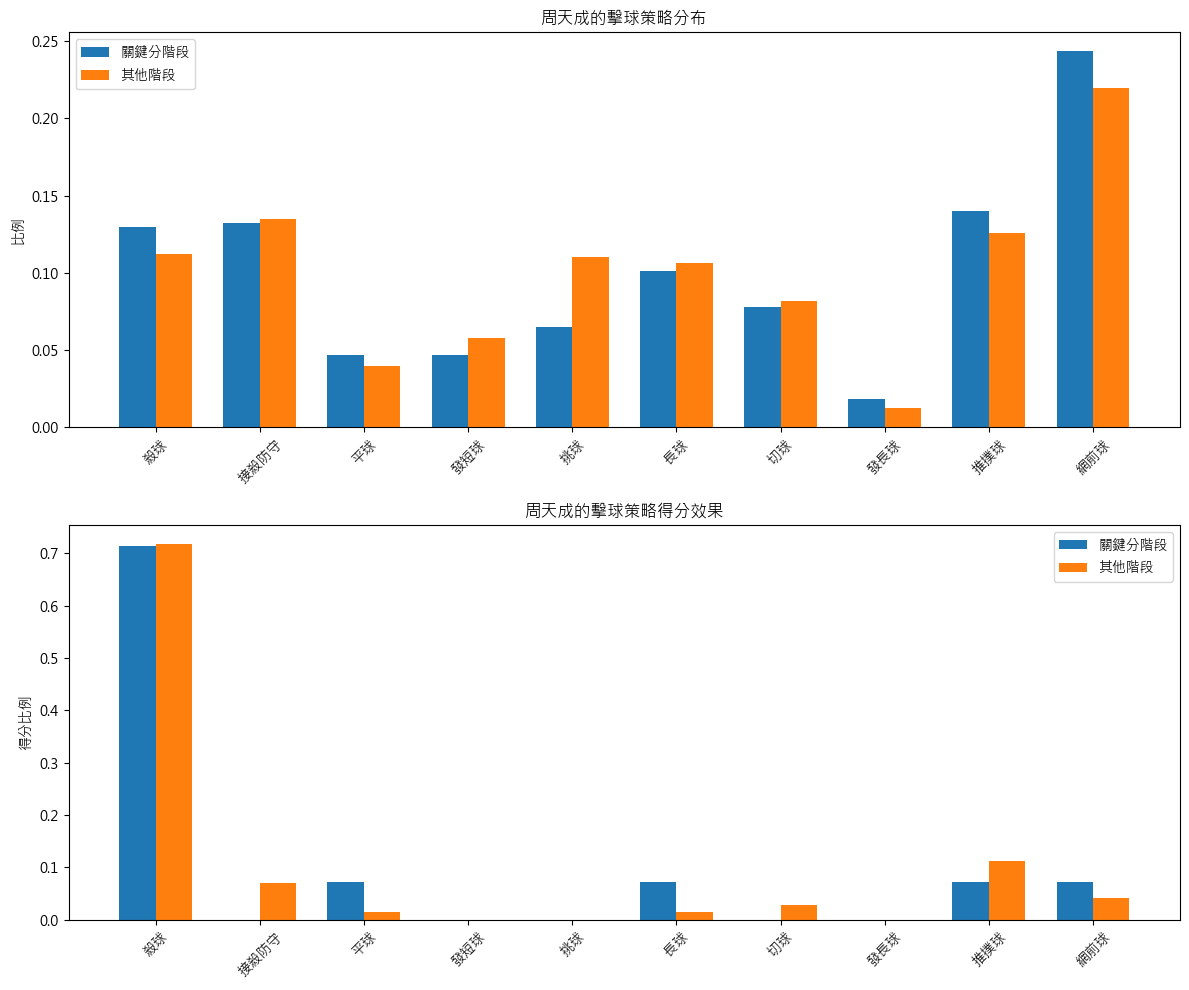

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 確認當前系統，設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 確認數據是否有內容
if len(df) > 0:
    # 2. 定義關鍵分階段條件
    df['key_moment'] = ((df['player_score'] >= 18) | (df['opponent_score'] >= 18))

    # 3. 將數據分為關鍵分階段和其他階段
    key_moment_df = df[df['key_moment'] & (df['player'] == 'CHOU Tien Chen')]
    non_key_moment_df = df[~df['key_moment'] & (df['player'] == 'CHOU Tien Chen')]

    # 4. 分析周天成的擊球類型與頻率
    key_type_counts = key_moment_df['type'].value_counts(normalize=True)
    non_key_type_counts = non_key_moment_df['type'].value_counts(normalize=True)

    # 取交集的擊球類型
    all_types = set(key_type_counts.index).union(set(non_key_type_counts.index))

    # 5. 比較得分效果 (贏球手段)
    key_effect_df = key_moment_df[key_moment_df['getpoint_player'] == 'CHOU Tien Chen']
    non_key_effect_df = non_key_moment_df[non_key_moment_df['getpoint_player'] == 'CHOU Tien Chen']

    key_effect_counts = key_effect_df['type'].value_counts(normalize=True)
    non_key_effect_counts = non_key_effect_df['type'].value_counts(normalize=True)

    # 6. 可視化
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: 擊球策略的選擇頻率
    width = 0.35  # the width of the bars
    ind = np.arange(len(all_types))
    
    key_type_vals = [key_type_counts.get(t, 0) for t in all_types]
    non_key_type_vals = [non_key_type_counts.get(t, 0) for t in all_types]

    axes[0].bar(ind - width/2, key_type_vals, width, label='關鍵分階段')
    axes[0].bar(ind + width/2, non_key_type_vals, width, label='其他階段')

    axes[0].set_xticks(ind)
    axes[0].set_xticklabels(all_types, rotation=45)
    axes[0].set_ylabel('比例')
    axes[0].set_title('周天成的擊球策略分布')
    axes[0].legend()

    # Plot 2: 擊球策略的得分效果
    key_effect_vals = [key_effect_counts.get(t, 0) for t in all_types]
    non_key_effect_vals = [non_key_effect_counts.get(t, 0) for t in all_types]

    axes[1].bar(ind - width/2, key_effect_vals, width, label='關鍵分階段')
    axes[1].bar(ind + width/2, non_key_effect_vals, width, label='其他階段')

    axes[1].set_xticks(ind)
    axes[1].set_xticklabels(all_types, rotation=45)
    axes[1].set_ylabel('得分比例')
    axes[1].set_title('周天成的擊球策略得分效果')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
else:
    print("數據集為空，無法進行分析")

第45題(wrong)
在周天成連續失分3分(含)以上時，他的打擊策略選擇是否變得激進或過於保守？

周天成在失分連續3分或以上的情況下策略選擇和效果：
    is_chou_score_status  type  frequency  points_won  effectiveness
10                  True    切球         58           0       0.000000
11                  True    平球         16           0       0.000000
12                  True    挑球         59           0       0.000000
13                  True  接殺防守         52           0       0.000000
14                  True   推撲球         35           1       0.028571
15                  True    殺球         34           7       0.205882
16                  True   發短球         39           0       0.000000
17                  True   發長球          5           0       0.000000
18                  True   網前球         79           1       0.012658
19                  True    長球         68           0       0.000000

周天成在正常情況下策略選擇和效果：
   is_chou_score_status  type  frequency  points_won  effectiveness
0                 False    切球        153           2       0.013072
1                 False    平球         90           2       0

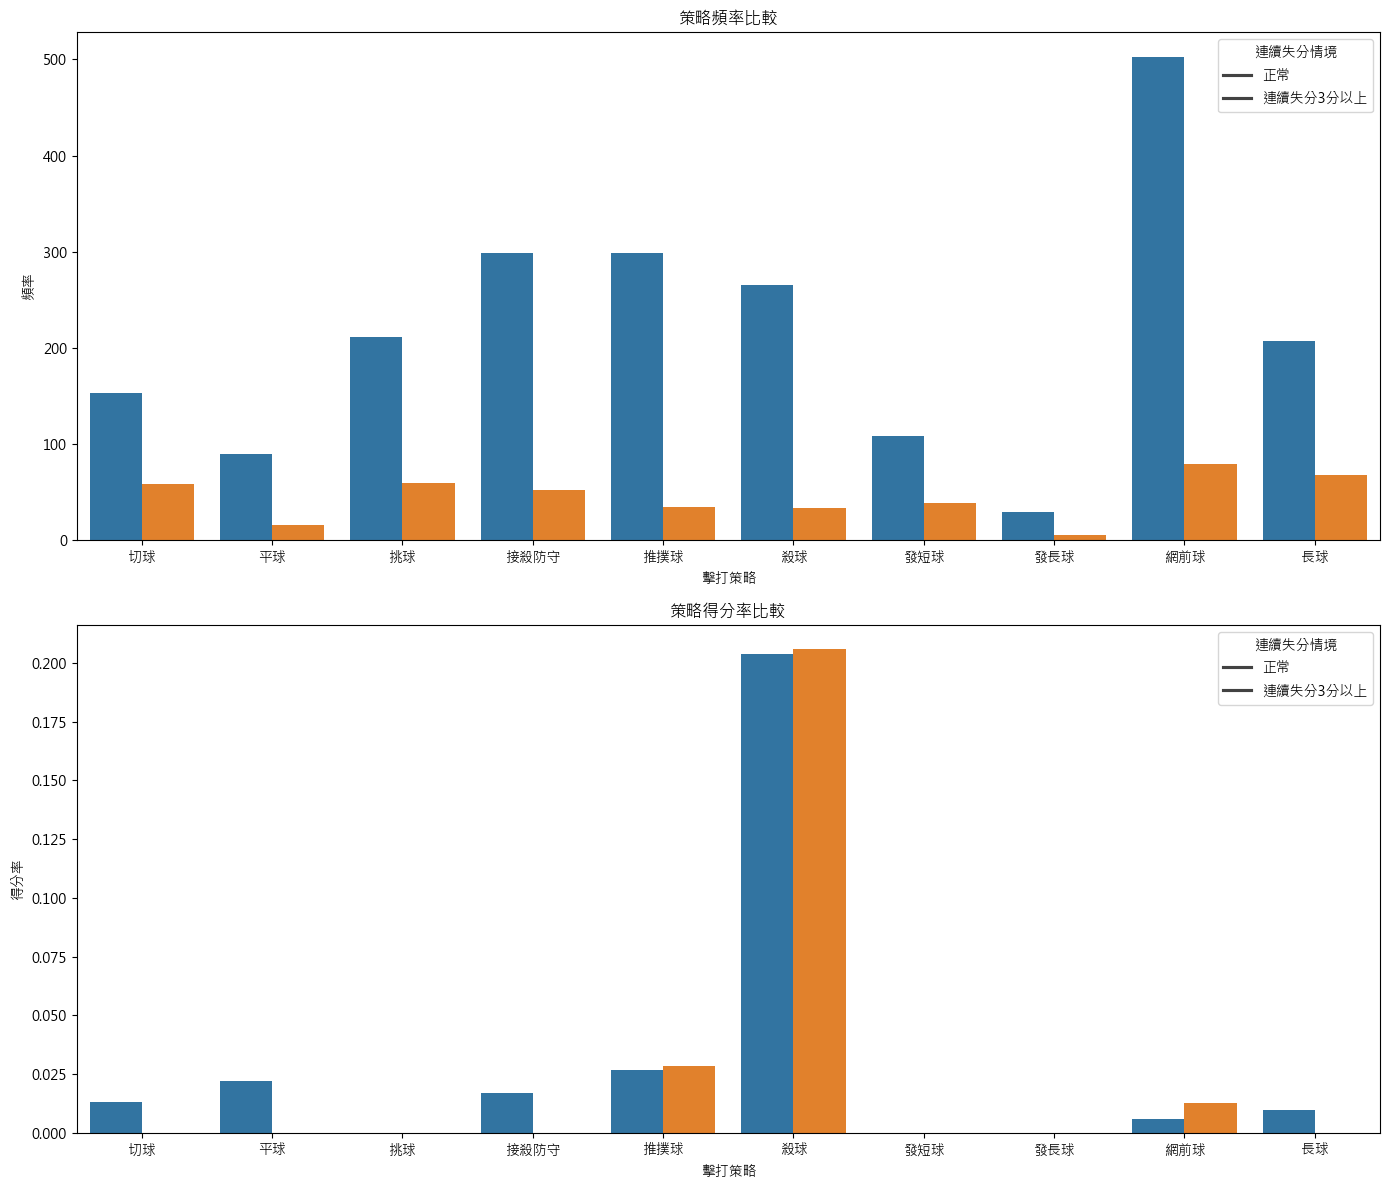

In [57]:
import pandas as pd
import numpy as np

# 確認數據量是否大於0
if len(df) > 0:
    # 處理缺失值，對於getpoint_player用適當的方式處理（因為可能有空值）
    df.loc[:, 'getpoint_player'] = df['getpoint_player'].fillna('')
    
    # 添加場上狀況
    df['is_chou_score_status'] = df['score_status'] <= -3

    # 根據player過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 在各種情境下計算打擊策略的頻率和效果
    strategy_df = chou_df.groupby(['is_chou_score_status', 'type']).agg(
        frequency=('type', 'size'),
        points_won=('getpoint_player', lambda x: (x == 'CHOU Tien Chen').sum())
    ).reset_index()

    # 添加策略效果（得分率）
    strategy_df['effectiveness'] = strategy_df['points_won'] / strategy_df['frequency']

    # 分別將連續失分情境和非失分情境數據取出
    losing_streak_df = strategy_df[strategy_df['is_chou_score_status']]
    normal_df = strategy_df[~strategy_df['is_chou_score_status']]

    # 打印策略選擇和得分效果比較
    print("周天成在失分連續3分或以上的情況下策略選擇和效果：")
    print(losing_streak_df)
    print("\n周天成在正常情況下策略選擇和效果：")
    print(normal_df)

    # 可視化策略選擇頻率和得分效果
    import platform
    import matplotlib.pyplot as plt
    import seaborn as sns

    s = platform.system()
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False

    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    #策略頻率
    sns.barplot(x='type', y='frequency', hue='is_chou_score_status', data=strategy_df, ax=axes[0])
    axes[0].set_title('策略頻率比較')
    axes[0].set_ylabel('頻率')
    axes[0].set_xlabel('擊打策略')
    axes[0].legend(title='連續失分情境', labels=['正常', '連續失分3分以上'])

    #策略效果
    sns.barplot(x='type', y='effectiveness', hue='is_chou_score_status', data=strategy_df, ax=axes[1])
    axes[1].set_title('策略得分率比較')
    axes[1].set_ylabel('得分率')
    axes[1].set_xlabel('擊打策略')
    axes[1].legend(title='連續失分情境', labels=['正常', '連續失分3分以上'])

    plt.tight_layout()
    fig.savefig('strategy_comparison.png')
else:
    print("數據集中沒有資料，無法進行分析。")

第46題(大致OK)
周天成在長回合相較於短回合較常失誤的球種?

   rally_type  type  error_rate
0         短回合    切球    0.102564
1         短回合    平球    0.172414
2         短回合    挑球    0.111111
3         短回合  接殺防守    0.282051
4         短回合   推撲球    0.090909
5         短回合    殺球    0.117647
6         短回合   網前球    0.127517
7         短回合    長球    0.096154
8         長回合    切球    0.017442
9         長回合    平球    0.038961
10        長回合    挑球    0.048309
11        長回合  接殺防守    0.054945
12        長回合   推撲球    0.042553
13        長回合    殺球    0.046729
14        長回合   網前球    0.048499
15        長回合    長球    0.035874


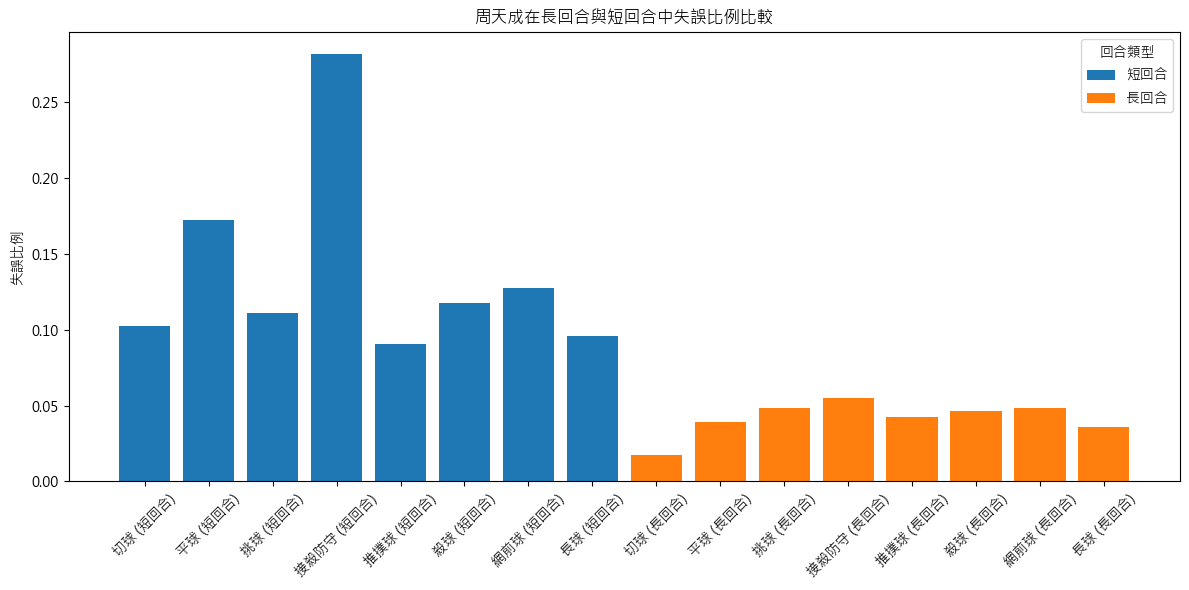

In [58]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# Set the plotting fonts
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# Ensure the dataframe is not empty
if len(df) > 0:
    # Filter to only include rows where the player is CHOU Tien Chen
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # Calculate the number of shots (ball_round) in each rally
    # Classify each rally as long or short
    rally_classification = chou_df.groupby(['match_id', 'set', 'rally']).agg({'ball_round': 'max'}).reset_index()
    rally_classification['rally_type'] = rally_classification['ball_round'].apply(lambda x: '長回合' if x > 10 else '短回合')

    # Merge this classification back to the main dataframe
    chou_df = pd.merge(chou_df, rally_classification[['match_id', 'set', 'rally', 'rally_type']], on=['match_id', 'set', 'rally'], how='left')

    # Filter rows where CHOU Tien Chen made an error
    error_df = chou_df[chou_df['lose_reason'].notna()]

    # Calculate error rates for each shot type in both long and short rallies
    error_counts = error_df.groupby(['rally_type', 'type']).size().reset_index(name='error_count')
    total_counts = chou_df.groupby(['rally_type', 'type']).size().reset_index(name='total_count')

    # Merge to get error rates
    error_rates = pd.merge(error_counts, total_counts, on=['rally_type', 'type'])
    error_rates['error_rate'] = error_rates['error_count'] / error_rates['total_count']

    # Visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    for rally_type in error_rates['rally_type'].unique():
        subset = error_rates[error_rates['rally_type'] == rally_type]
        ax.bar(subset['type'] + ' (' + rally_type + ')', subset['error_rate'], label=rally_type)

    # Add labels, legend, and title
    ax.set_ylabel('失誤比例')
    ax.set_title('周天成在長回合與短回合中失誤比例比較')
    ax.legend(title='回合類型')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Print the error rates for precise numbers
    print(error_rates[['rally_type', 'type', 'error_rate']])
else:
    print("The dataframe is empty.")

第47題(大致OK)
分析周天成在不同對手類型中，殺球成功率差異。

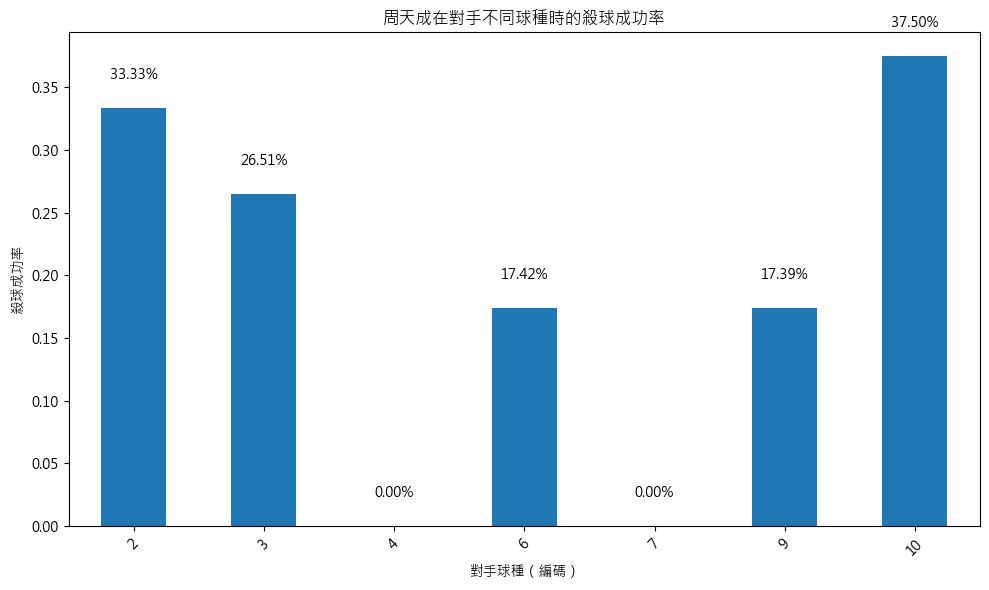

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認非空數據
if len(df) == 0:
    raise ValueError("DataFrame is empty")

# 定義殺球成功：周天成殺球並得分
df['is_smash'] = (df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')
df['is_successful_smash'] = df['is_smash'] & (df['getpoint_player'] == 'CHOU Tien Chen')

# 計算周天成在不同對手球種後的殺球成功率
# 獲取對手球種信息，即對手上一個球的 player_type
df['opponent_last_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(1)

# 過濾掉無效數據
filtered_df = df.dropna(subset=['opponent_last_type'])

# 分組計算
success_count = filtered_df[filtered_df['is_successful_smash']].groupby('opponent_last_type')['rally_id'].count()
total_count = filtered_df[filtered_df['is_smash']].groupby('opponent_last_type')['rally_id'].count()

# 計算殺球成功率
success_rate = (success_count / total_count).fillna(0)

# 繪圖
fig, ax = plt.subplots(figsize=(10, 6))
success_rate.plot(kind='bar', ax=ax)

# 圖表標籤
ax.set_title('周天成在對手不同球種時的殺球成功率')
ax.set_xlabel('對手球種（編碼）')
ax.set_ylabel('殺球成功率')
ax.set_xticks(np.arange(len(success_rate)))
ax.set_xticklabels(success_rate.index.astype(int), rotation=45)

# 加上顯示百分比
for i, v in enumerate(success_rate):
    ax.text(i, v + 0.02, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()

第48題(OK)
比較周天成與他的對手的球種使用頻率與其得分率。

周天成各球種使用頻率 (%)： type
網前球     22.307397
接殺防守    13.453430
推撲球     12.801840
殺球      11.460330
長球      10.540437
挑球      10.348793
切球       8.087390
發短球      5.634343
平球       4.062859
發長球      1.303181
Name: count, dtype: float64
周天成各球種得分率 (%)： type
切球       0.947867
平球       1.886792
挑球       0.000000
接殺防守     1.424501
推撲球      2.694611
殺球      20.401338
發短球      0.000000
發長球      0.000000
網前球      0.687285
長球       0.727273
Name: count, dtype: float64
對手各球種使用頻率 (%)： type
網前球     17.572254
挑球      16.763006
接殺防守    13.949904
切球      12.524085
殺球      11.406551
推撲球      8.477842
長球       8.053950
發短球      8.015414
平球       2.928709
發長球      0.308285
Name: count, dtype: float64
對手各球種得分率 (%)： type
切球       1.230769
平球       1.315789
挑球       0.459770
接殺防守     0.828729
推撲球      7.727273
殺球      10.472973
發短球      0.000000
發長球      0.000000
網前球      1.315789
長球       0.956938
Name: count, dtype: float64


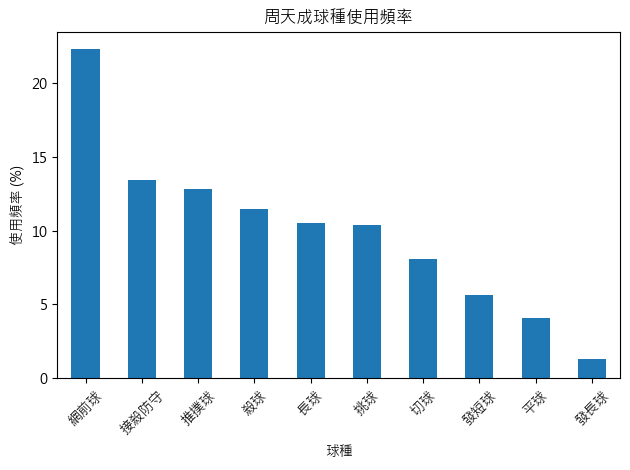

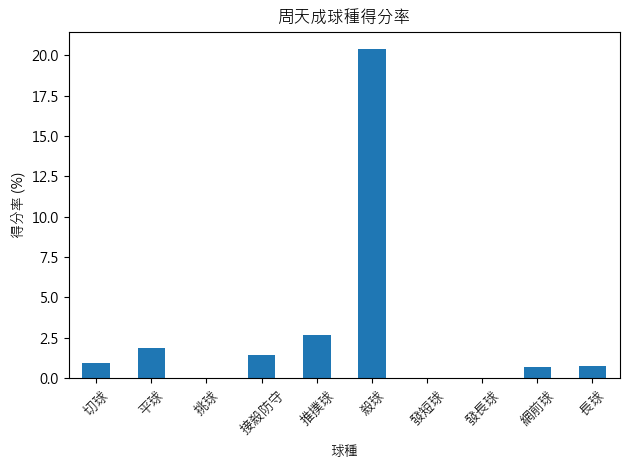

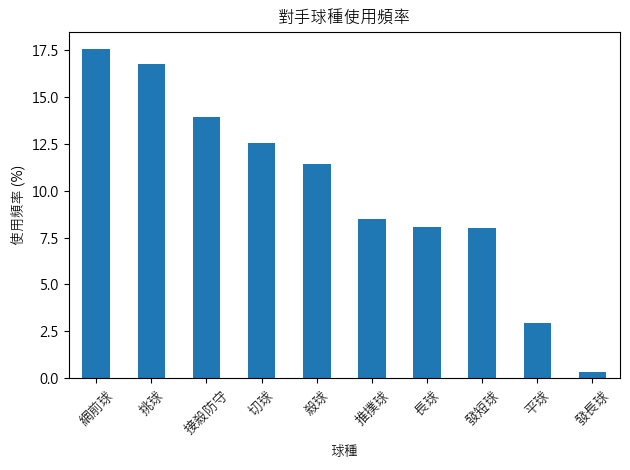

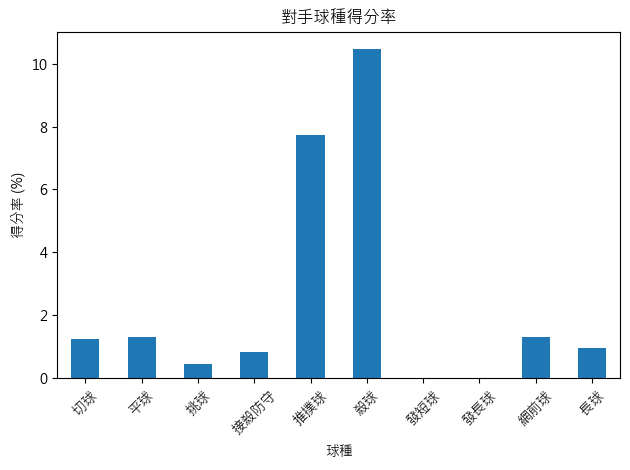

In [61]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else [
    'Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認資料集是否存在並非空
if len(df) == 0:
    raise ValueError("DataFrame is empty")

# 球種類別對應表
shot_types = {
    '發短球': 1.0, '長球': 3.0, '推撲球': 9.0, '殺球': 4.0,
    '接殺防守': 10.0, '平球': 7.0, '網前球': 8.0, '挑球': 6.0,
    '切球': 5.0, '發長球': 2.0
}

# 定義畫圖函數
def plot_bar(data, title, ylabel, xlabel='球種'):
    fig, ax = plt.subplots()
    data.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return fig

# 計算球種使用頻率與得分率
def calculate_shot_stats(player_name):
    player_df = df[df['player'] == player_name]
    shot_usage = player_df['type'].value_counts()
    shot_success = player_df[(player_df['getpoint_player'] == player_name)]['type'].value_counts()
    shot_frequency = shot_usage / shot_usage.sum() * 100
    shot_success_rate = (shot_success / shot_usage).fillna(0) * 100
    
    return shot_usage, shot_frequency, shot_success_rate

# 計算周天成與其對手的數據
chou_shot_usage, chou_shot_frequency, chou_shot_success_rate = calculate_shot_stats('CHOU Tien Chen')
opponent_shot_usage, opponent_shot_frequency, opponent_shot_success_rate = calculate_shot_stats('Kento MOMOTA')

print("周天成各球種使用頻率 (%)：", chou_shot_frequency)
print("周天成各球種得分率 (%)：", chou_shot_success_rate)

print("對手各球種使用頻率 (%)：", opponent_shot_frequency)
print("對手各球種得分率 (%)：", opponent_shot_success_rate)

# 繪製周天成與他的對手的數據
fig1 = plot_bar(chou_shot_frequency, '周天成球種使用頻率', '使用頻率 (%)')
fig2 = plot_bar(chou_shot_success_rate, '周天成球種得分率', '得分率 (%)')

fig3 = plot_bar(opponent_shot_frequency, '對手球種使用頻率', '使用頻率 (%)')
fig4 = plot_bar(opponent_shot_success_rate, '對手球種得分率', '得分率 (%)')

第49題(Wrong)
比較周天成在各局自己先得分與對手先得分情況下的勝率差別。

In [62]:
import pandas as pd

# 驗證數據是否存在
if len(df) > 0:
    # 1. 創建一個新的欄位來標記誰是每個rally中第一個得分者
    df['first_score_player'] = df.groupby(['match_id', 'set', 'rally'])['getpoint_player'].transform('first')

    # 2. 過濾掉中間的拍數，只保留每一個rally中的第一拍
    first_shot_df = df.groupby(['match_id', 'set', 'rally']).first().reset_index()

    # 3. 計算周天成在不同情況（自己先得分 vs. 對手先得分）下的每局勝率
    chou_first = first_shot_df[first_shot_df['first_score_player'] == 'CHOU Tien Chen']
    opponent_first = first_shot_df[first_shot_df['first_score_player'] != 'CHOU Tien Chen']

    # 計算贏得的局數
    chou_first_wins = chou_first[chou_first['getpoint_player'] == 'CHOU Tien Chen'].groupby(['match_id', 'set']).ngroups
    opponent_first_wins = opponent_first[opponent_first['getpoint_player'] == 'CHOU Tien Chen'].groupby(['match_id', 'set']).ngroups

    # 計算總局數
    chou_first_total_sets = chou_first.groupby(['match_id', 'set']).ngroups
    opponent_first_total_sets = opponent_first.groupby(['match_id', 'set']).ngroups

    # 計算勝率
    chou_first_win_rate = chou_first_wins / chou_first_total_sets if chou_first_total_sets > 0 else 0
    opponent_first_win_rate = opponent_first_wins / opponent_first_total_sets if opponent_first_total_sets > 0 else 0

    print(f"周天成在自己先得分的情況下的勝率: {chou_first_win_rate:.2%}")
    print(f"周天成在對手先得分的情況下的勝率: {opponent_first_win_rate:.2%}")

else:
    print("數據集為空。")

周天成在自己先得分的情況下的勝率: 100.00%
周天成在對手先得分的情況下的勝率: 0.00%


第50題(wrong-領先與落後邏輯搞反)
分析周天成在「領先 3 分以上」時的擊球策略是否更保守？請統計球種比例。

type
網前球     0.211934
推撲球     0.162551
殺球      0.131687
接殺防守    0.125514
長球      0.121399
挑球      0.096708
切球      0.059671
其他      0.090535
Name: proportion, dtype: float64


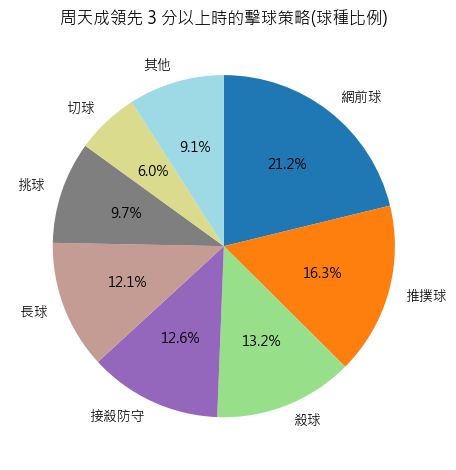

In [63]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集非空
if len(df) > 0:
    # 篩選周天成領先3分以上的數據
    filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['score_status'] > 3)].copy()

    # 計算球種的使用頻率
    shot_type_counts = filtered_df['type'].value_counts(normalize=True)

    # 合併小於 5% 的類別為「其他」
    shot_type_counts['其他'] = shot_type_counts[shot_type_counts < 0.05].sum()
    shot_type_counts = shot_type_counts[shot_type_counts >= 0.05]

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    shot_type_counts.plot.pie(
        ax=ax, 
        labels=shot_type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colormap='tab20'
    )
    ax.set_ylabel('')
    ax.set_title('周天成領先 3 分以上時的擊球策略(球種比例)')
    plt.tight_layout()

    print(shot_type_counts)

else:
    print('數據集為空，無法進行分析。')

第51題(wrong)
當分數差距逐漸縮小時（領先轉膠著），周天成殺球成功率是否下降？

在周天成從領先到膠著的殺球成功率: 9.04%


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\632080186.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_by_match = df[df['lead_to_tight']].groupby('match_id').apply(


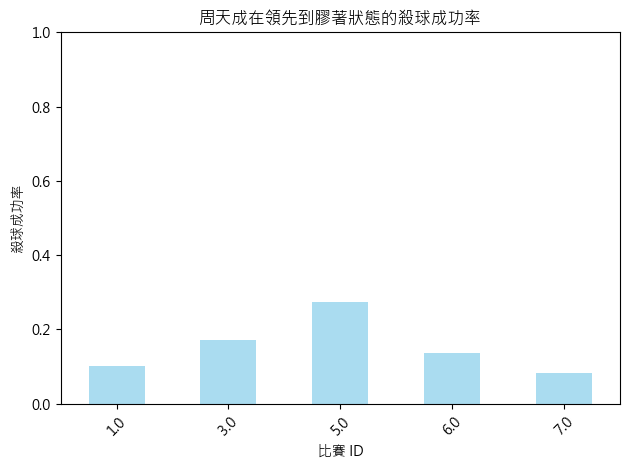

In [64]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保 DataFrame 不為空
if len(df) > 0:
    # 確認周天成擊球，並且領先但逐漸縮小到膠著狀態
    lead_to_tight_conditions = (df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球') & (df['score_status'] > 0)

    # 加入「前一球的score_status」欄位
    df['prev_score_status'] = df.groupby(['match_id', 'set'])['score_status'].shift(1)

    # 找出從領先到膠著的狀況
    df['lead_to_tight'] = lead_to_tight_conditions & (df['prev_score_status'] > 0) & (df['score_status'] <= 3)

    # 殺球總次數計算
    total_kills = df[lead_to_tight_conditions].shape[0]
    df_kills_success = df[df['lead_to_tight'] & (df['getpoint_player'] == 'CHOU Tien Chen')]
    successful_kills = df_kills_success.shape[0]

    if total_kills > 0:
        success_rate = successful_kills / total_kills
        print(f"在周天成從領先到膠著的殺球成功率: {success_rate:.2%}")

        # 視覺化
        fig, ax = plt.subplots()
        
        # Group by match_id for more detailed analysis, can be customized
        success_rate_by_match = df[df['lead_to_tight']].groupby('match_id').apply(
            lambda g: g[g['getpoint_player'] == 'CHOU Tien Chen'].shape[0] / g.shape[0] if g.shape[0] > 0 else 0
        )
        
        success_rate_by_match.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
        
        ax.set_title('周天成在領先到膠著狀態的殺球成功率')
        ax.set_xlabel('比賽 ID')
        ax.set_ylabel('殺球成功率')
        ax.set_ylim(0, 1)
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        print('無法進行成功率計算，因為沒有符合條件的殺球數據。')
else:
    print('數據集為空，無法進行分析。')

第52題(大致OK，但不精確回球質量)
分析周天成在對手回球質量降低情況下（落點過中、回球過淺）的得分方式統計。

Total Attempts: 1813
Total Scores Considering Return Quality Condition: 55
Efficiency of Scoring: 0.03033645890788748
Shot Type Distribution:
 type
殺球      35
推撲球      9
接殺防守     5
網前球      4
切球       1
平球       1
Name: count, dtype: int64
Score Location Distribution:
 landing_area
8.0     9
5.0     8
9.0     8
4.0     6
12.0    4
1.0     3
20.0    3
16.0    3
24.0    2
7.0     2
11.0    2
21.0    1
3.0     1
6.0     1
30.0    1
13.0    1
Name: count, dtype: int64


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2527968989.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(shot_analysis.index, rotation=45, ha='right')


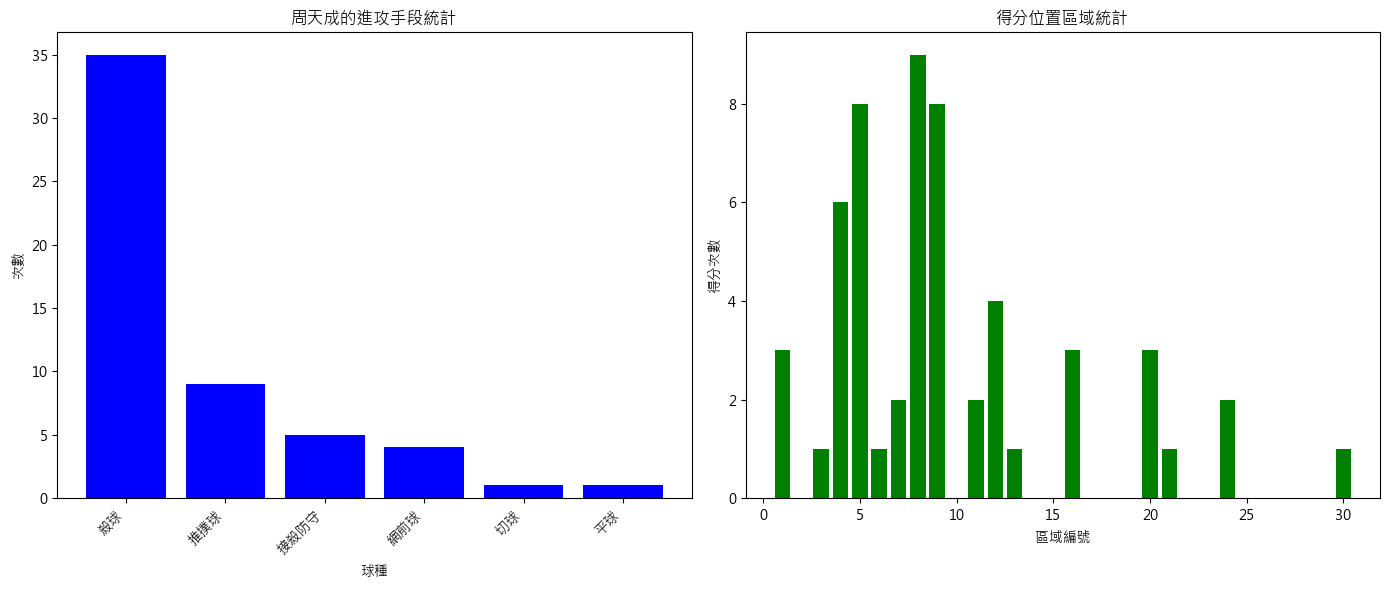

In [65]:
import platform
import pandas as pd
import matplotlib.pyplot as plt

# Font configuration
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# Ensure the DataFrame is not empty
if len(df) > 0:
    # Filter: Get rallies where opponent's return lands in midcourt or shallow zones
    df['prev_landing_area'] = df.groupby(['match_id', 'set', 'rally'])['landing_area'].shift(1)
    target_areas = list(range(5, 25))  # Midcourt and shallow areas
    df_filtered_mid_shallow = df[df['prev_landing_area'].isin(target_areas) & (df['player'] == 'CHOU Tien Chen')]

    # Filter: CHOU Tien Chen scores
    df_score = df_filtered_mid_shallow[df_filtered_mid_shallow['getpoint_player'] == 'CHOU Tien Chen']

    # Group by shot type to get statistics
    shot_analysis = df_score['type'].value_counts()

    # Determine scoring locations
    score_location = df_score['landing_area'].value_counts()

    # Efficiency calculation
    total_attempts = df_filtered_mid_shallow.shape[0]
    efficiency = len(df_score) / total_attempts if total_attempts > 0 else 0

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.bar(shot_analysis.index, shot_analysis.values, color='b')
    ax1.set_title('周天成的進攻手段統計')
    ax1.set_xlabel('球種')
    ax1.set_ylabel('次數')
    ax1.set_xticklabels(shot_analysis.index, rotation=45, ha='right')

    ax2.bar(score_location.index, score_location.values, color='g')
    ax2.set_title('得分位置區域統計')
    ax2.set_xlabel('區域編號')
    ax2.set_ylabel('得分次數')
    
    plt.tight_layout()

    # Print efficiency and analysis
    print("Total Attempts:", total_attempts)
    print("Total Scores Considering Return Quality Condition:", len(df_score))
    print("Efficiency of Scoring:", efficiency)
    print("Shot Type Distribution:\n", shot_analysis)
    print("Score Location Distribution:\n", score_location)

else:
    print("The DataFrame is empty and cannot be processed.")

第53題(大致OK)
當周天成接到「後場高遠球」時，他採取直線 vs 斜線的比例比較。

周天成接到後場高遠球時的回球方向比例：
shot_direction
斜線    0.831325
直線    0.168675
Name: proportion, dtype: float64


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\1279324114.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['shot_direction'] = relevant_df.apply(shot_direction, axis=1)


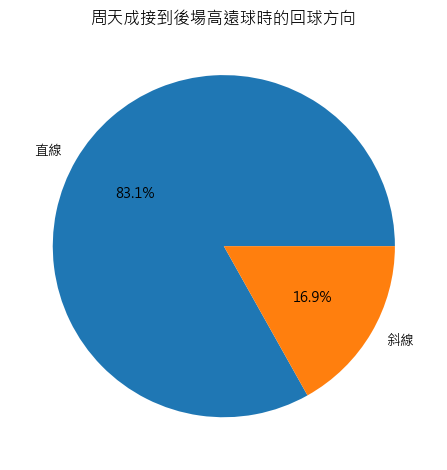

In [66]:
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據存在且長度大於0
if len(df) > 0:
    # 定義後場區域 (1, 2, 3, 4)
    back_court_areas = [1, 2, 3, 4]

    # 篩選周天成接到後場高遠球的資料
    relevant_df = df[(df['opponent'] == 'CHOU Tien Chen') & 
                     (df['opponent_type'] == 3) & 
                     (df['hit_area'].isin(back_court_areas))]

    # 確認選到的資料有效
    if len(relevant_df) > 0:
        # 判斷直線和斜線
        def shot_direction(row):
            # 擊球點的Row和落球點的Row：Row 1 (後場) 行為 [1, 2, 3, 4]
            hit_row = (row['hit_area'] - 1) // 4 + 1
            landing_row = (row['landing_area'] - 1) // 4 + 1

            if hit_row == landing_row:
                return '直線'
            else:
                return '斜線'

        relevant_df['shot_direction'] = relevant_df.apply(shot_direction, axis=1)

        # 計算各類型的回球次數
        direction_count = relevant_df['shot_direction'].value_counts(normalize=True)

        # 打印比例
        print("周天成接到後場高遠球時的回球方向比例：")
        print(direction_count)

        # 繪製餅圖
        fig, ax = plt.subplots()
        direction_count.plot.pie(autopct='%.1f%%', labels=['直線', '斜線'], ax=ax)
        ax.set_ylabel('')
        ax.set_title('周天成接到後場高遠球時的回球方向')
        plt.tight_layout()

else:
    print("數據不可用或空數據集。")

第54題(wrong-沒辦法看該回合是誰得分)
周天成的發球種類是否影響他在該回合的得分率

各種類發球的總次數：
type
發短球    147
發長球     34
Name: count, dtype: int64

各種類發球的得分次數：
Series([], Name: count, dtype: int64)

各種類發球的得分率：
type
發短球    0.0
發長球    0.0
Name: count, dtype: float64


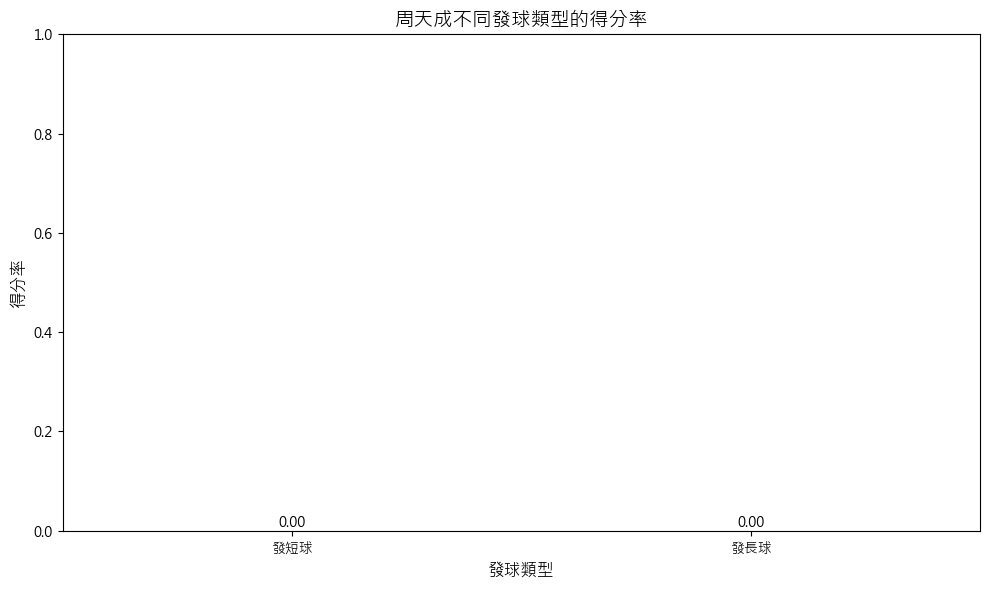

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集非空
if len(df) > 0:
    # 過濾出周天成的發球情況
    chou_serves = df[(df['player'] == 'CHOU Tien Chen') & (df['type'].isin(['發短球', '發長球']))]

    # 計算各發球類型的總次數
    serve_counts = chou_serves['type'].value_counts()

    # 計算各發球類型下的得分次數
    successful_serves = chou_serves[chou_serves['getpoint_player'] == 'CHOU Tien Chen']['type'].value_counts()

    # 計算得分率
    serve_success_rate = (successful_serves / serve_counts).fillna(0)  # Fillna to handle division by zero

    # 打印計算詳細
    print("各種類發球的總次數：")
    print(serve_counts)
    print("\n各種類發球的得分次數：")
    print(successful_serves)
    print("\n各種類發球的得分率：")
    print(serve_success_rate)

    # 視覺化結果
    fig, ax = plt.subplots(figsize=(10, 6))
    serve_success_rate.plot(kind='bar', color='skyblue', ax=ax)
    
    # 添加數值標籤
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')
    
    # 圖表標題和標籤
    ax.set_title('周天成不同發球類型的得分率', fontsize=14)
    ax.set_xlabel('發球類型', fontsize=12)
    ax.set_ylabel('得分率', fontsize=12)
    ax.set_ylim(0, 1)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # 確認圖形生成
    fig

第55題(OK)
分析周天成接發球策略：長球、網前球、平球的比例。

In [68]:
import pandas as pd

# 確保數據量大於0
if len(df) > 0:
    # 篩選出周天成在接發球時的數據
    chou_reception_df = df[(df['ball_round'] == 2) & (df['player'] == 'CHOU Tien Chen')]
    
    # 篩選出特定策略的使用情況
    strategies = ['長球', '網前球', '平球']
    chou_strategy_df = chou_reception_df[chou_reception_df['type'].isin(strategies)]
    
    # 計算每種策略的使用次數
    strategy_counts = chou_strategy_df['type'].value_counts()
    total_receptions = len(chou_strategy_df)
    
    # 計算比例
    strategy_proportions = strategy_counts / total_receptions * 100

    # 打印結果
    print("周天成在接發球時使用的不同行動策略比例：")
    for strategy, proportion in strategy_proportions.items():
        print(f"{strategy}: {proportion:.2f}%")
else:
    print("數據表是空的！")

周天成在接發球時使用的不同行動策略比例：
網前球: 89.80%
長球: 5.10%
平球: 5.10%


第56題(wrong)
當周天成連續得分 3 分以上時，他的球種選擇是否變得更激進？

周天成連續得分3分以上時的進攻性球種比例： 0.2601156069364162
其他情況下的進攻性球種比例： 0.21943947525342875


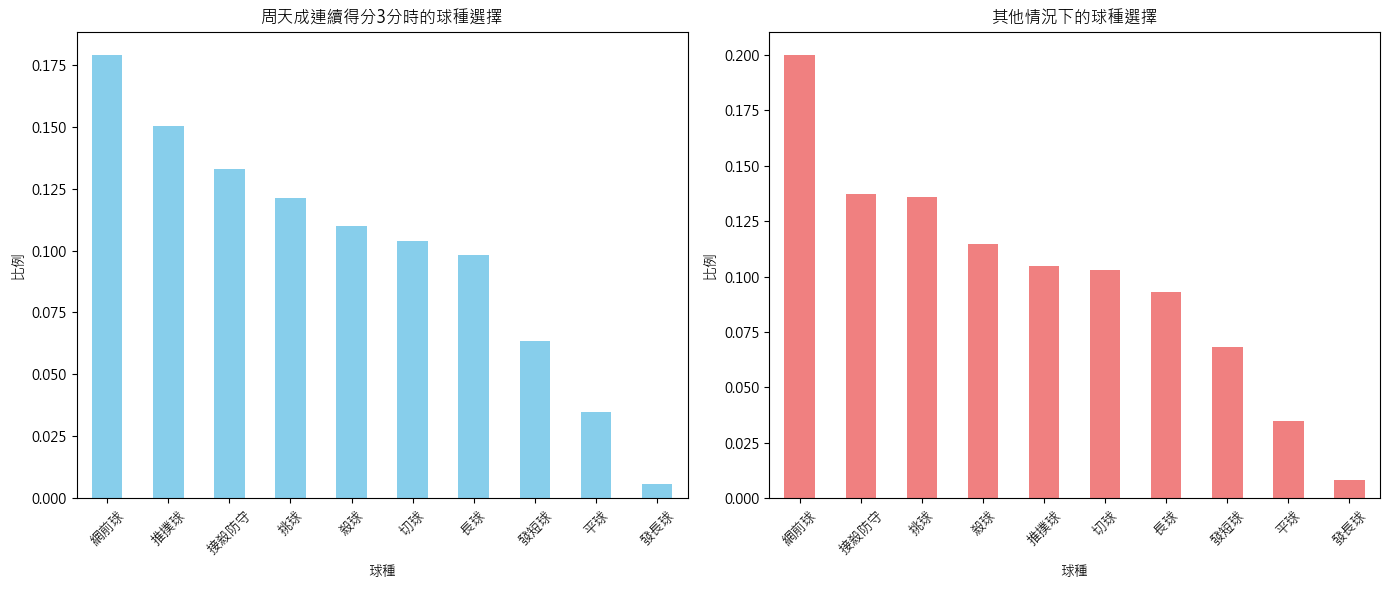

In [69]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認資料是否有值
if len(df) > 0:
    # 確保資料按照(match_id, set, rally, ball_round)排序
    df = df.sort_values(by=['match_id', 'set', 'rally', 'ball_round'])
    
    # 計算周天成的分數，並具體到每球的情況
    df['chou_tien_chen_score'] = df['opponent_score'] + (df['getpoint_player'] == 'CHOU Tien Chen').astype(int)
    
    # 計算分數變化，shift()後逐步子也要是整數形式
    df['score_diff'] = df['chou_tien_chen_score'].diff().fillna(0).astype(int)
    
    # 計算連續得分記錄
    df['consecutive_points_flag'] = ((df['score_diff'] == 1) & (df['getpoint_player'].shift(1) == 'CHOU Tien Chen')).astype(int)
    df['consecutive_points'] = df.groupby(['match_id', 'set'])['consecutive_points_flag'].cumsum()

    # 尋找連續得分數超過3的情況
    df['consecutive_points_group'] = (df['consecutive_points'] >= 3).astype(int)
    
    # 定義進攻性球種
    offensive_shots = ['殺球', '推撲球']

    # 分析連續得分場景與其他場景的球種選擇
    consecutive_df = df[df['consecutive_points_group'] == 1]
    non_consecutive_df = df[df['consecutive_points_group'] == 0]
    
    # 分別計算不同場景下的球種選擇的頻率
    consecutive_shot_counts = consecutive_df['type'].value_counts(normalize=True)
    non_consecutive_shot_counts = non_consecutive_df['type'].value_counts(normalize=True)

    # 計算進攻性球種的比例
    consecutive_offensive_ratio = consecutive_shot_counts[offensive_shots].sum()
    non_consecutive_offensive_ratio = non_consecutive_shot_counts[offensive_shots].sum()

    # 打印結果
    print("周天成連續得分3分以上時的進攻性球種比例：", consecutive_offensive_ratio)
    print("其他情況下的進攻性球種比例：", non_consecutive_offensive_ratio)

    # 繪製圖表
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    consecutive_shot_counts.plot(kind='bar', ax=ax[0], color='skyblue')
    ax[0].set_title('周天成連續得分3分時的球種選擇')
    ax[0].set_ylabel('比例')
    ax[0].set_xlabel('球種')
    ax[0].set_xticklabels(consecutive_shot_counts.index, rotation=45)

    non_consecutive_shot_counts.plot(kind='bar', ax=ax[1], color='lightcoral')
    ax[1].set_title('其他情況下的球種選擇')
    ax[1].set_ylabel('比例')
    ax[1].set_xlabel('球種')
    ax[1].set_xticklabels(non_consecutive_shot_counts.index, rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("資料集為空，無法進行分析。")

第57題(大致OK)
周天成在比賽後段（第 2、3 局）移動距離與失誤率的關聯分析。

移動距離與失誤率的皮爾遜相關係數: 0.7518628135701337
對應的p值: 0.03144021738374847


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\3933884213.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['move_distance'] = np.sqrt(filtered_df['player_move_x']**2 + filtered_df['player_move_y']**2)
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\3933884213.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_mistake'] = filtered_df['lose_reason'].notna().astype(int)


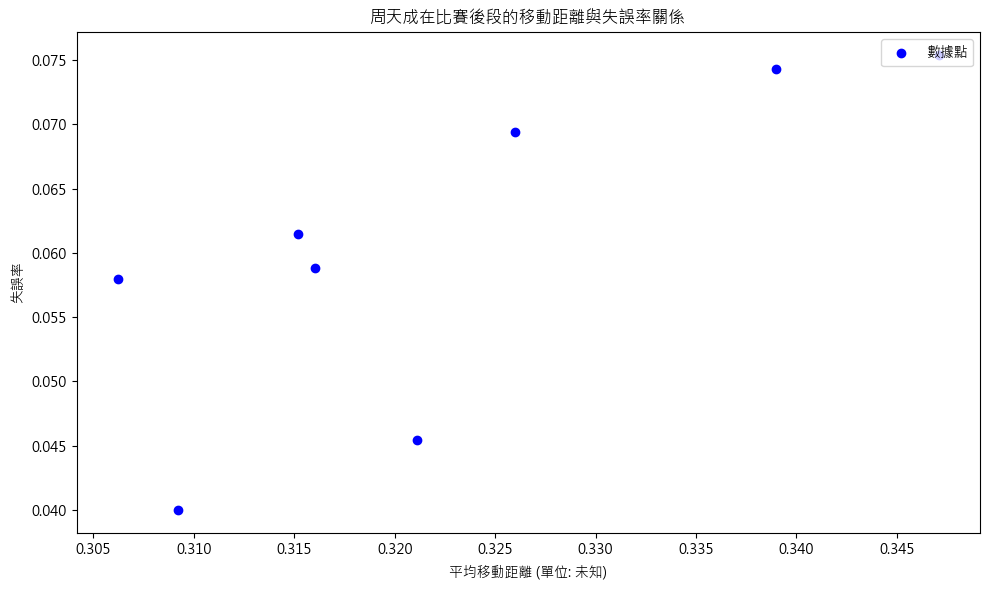

In [70]:
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認 df 不為空
if len(df) > 0:
    # 篩選比賽後段的數據
    filtered_df = df[(df['set'].isin([2, 3])) & (df['player'] == 'CHOU Tien Chen')]
    
    # 計算每球的移動距離
    filtered_df['move_distance'] = np.sqrt(filtered_df['player_move_x']**2 + filtered_df['player_move_y']**2)
    
    # 計算失誤數量
    filtered_df['is_mistake'] = filtered_df['lose_reason'].notna().astype(int)
    
    # 進行逐局分組計算
    grouped_by_set = filtered_df.groupby(['match_id', 'set'])
    
    # 計算每局的平均移動距離與失誤率
    move_distance_by_set = grouped_by_set['move_distance'].mean()
    mistake_rate_by_set = grouped_by_set['is_mistake'].mean()

    # 合併計算結果為 DataFrame
    analysis_df = pd.DataFrame({
        'average_move_distance': move_distance_by_set,
        'mistake_rate': mistake_rate_by_set
    }).reset_index()
    
    # 相關性分析
    correlation, p_value = pearsonr(analysis_df['average_move_distance'], analysis_df['mistake_rate'])
    
    # 打印相關性指標
    print(f'移動距離與失誤率的皮爾遜相關係數: {correlation}')
    print(f'對應的p值: {p_value}')
    
    # 可視化移動距離與失誤率的關係
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.scatter(analysis_df['average_move_distance'], analysis_df['mistake_rate'], color='b', label='數據點')
    ax.set_title('周天成在比賽後段的移動距離與失誤率關係')
    ax.set_xlabel('平均移動距離 (單位: 未知)')
    ax.set_ylabel('失誤率')
    ax.legend(loc='upper right')
    plt.tight_layout()
else:
    print("數據集為空，無法進行分析。")

第58題(wrong-前後拍邏輯搞錯)
分析對手殺球到前中後排後，周天成分別會怎麼去反擊？

In [71]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 設置字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保DataFrame不為空
if len(df) > 0:
    # 定義場地區域
    front_court_zones = [17, 18, 19, 20, 21, 22, 23, 24]
    mid_court_zones = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    back_court_zones = [1, 2, 3, 4]

    # 過濾出對手擊球為殺球的情況並找出擊球落地點
    df_opponent_smash = df[(df['opponent'] == 'CHOU Tien Chen') & (df['type'].shift(1) == '殺球')]

    # 按落點區域分類
    df_opponent_smash['court_area_category'] = pd.cut(df_opponent_smash['landing_area'],
                                                      bins=[0, 4, 16, 24, 33],
                                                      labels=['後場', '中場', '前場', '出界'])

    # 分析周天成的反擊策略
    df_chou_reactions = df_opponent_smash[df_opponent_smash['player'] == 'CHOU Tien Chen'].copy()

    # 統計反擊策略
    strategy_counts = df_chou_reactions.groupby(['court_area_category', 'type']).size().reset_index(name='counts')

    # 繪製圖形
    if not strategy_counts.empty:
        fig, ax = plt.subplots(figsize=(12, 8))
        strategy_counts.pivot(index='type', columns='court_area_category', values='counts').plot(kind='bar', ax=ax)
        ax.set_title('周天成對不同區域殺球的反擊策略分佈')
        ax.set_xlabel('反擊球種')
        ax.set_ylabel('次數')
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        print("沒有符合條件的數據可分析。")
else:
    print("數據集為空。請提供數據。")

沒有符合條件的數據可分析。


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\3679712430.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opponent_smash['court_area_category'] = pd.cut(df_opponent_smash['landing_area'],
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\3679712430.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  strategy_counts = df_chou_reactions.groupby(['court_area_category', 'type']).size().reset_index(name='counts')


第59題(OK)
統計周天成成功逼迫對手挑球的頻率，以及最常造成的球種來源。

     球種   次數
0   網前球  276
1  接殺防守   78
2   發短球   39
3    切球   17
4    殺球    1
5    平球    1
6   推撲球    1


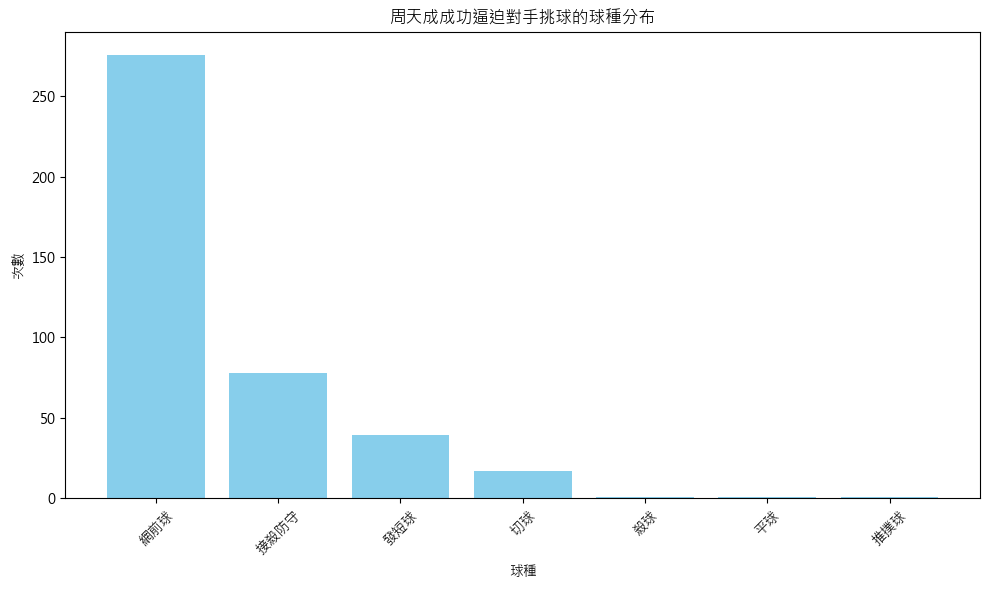

In [72]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據是否為空
if len(df) > 0:
    # 採用groupby和shift計算
    df['next_player_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(-1)

    # 篩選出周天成擊球且讓對手回應挑球的情況
    chou_fores_ball_types = df[(df['player'] == 'CHOU Tien Chen') & (df['next_player_type'] == 6)]

    # 統計周天成各種球種逼迫對方挑球的次數
    ball_type_count = chou_fores_ball_types['type'].value_counts().reset_index()
    ball_type_count.columns = ['球種', '次數']

    # 打印統計數據
    print(ball_type_count)

    # 繪製視覺化圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(ball_type_count['球種'], ball_type_count['次數'], color='skyblue')
    
    # 設定圖表標題和標籤
    ax.set_title("周天成成功逼迫對手挑球的球種分布")
    ax.set_xlabel("球種")
    ax.set_ylabel("次數")
    
    plt.xticks(rotation=45)  # 旋轉x標籤使其清晰
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No analysis was performed.")

第60題(OK)
當對手靠球場兩側時，周天成較常讓球落點到哪些區域？繪製熱區圖。

C:\Users\Danie\AppData\Local\Temp\ipykernel_604\954730311.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


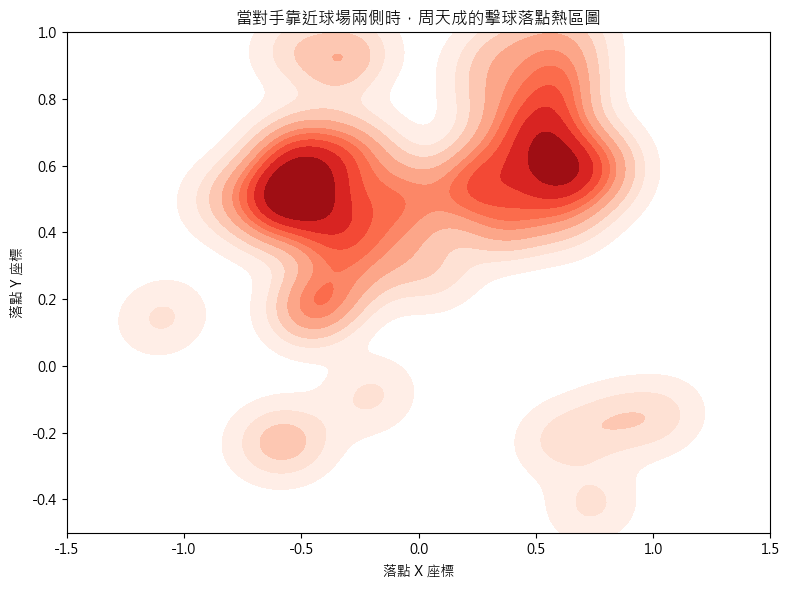

In [73]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認 df 不為空
if len(df) > 0:
    # 過濾出周天成的擊球數據
    chouts_play_df = df[df['player'] == 'CHOU Tien Chen']
    
    # 定義對手靠近球場兩側的區域 (左側：1, 5, 9, 13, 17, 21，右側：4, 8, 12, 16, 20, 24)
    side_areas = [1, 5, 9, 13, 17, 21, 4, 8, 12, 16, 20, 24]

    # 過濾當對手位於兩側時，周天成的擊球數據
    filtered_df = chouts_play_df[chouts_play_df['opponent_location_area'].isin(side_areas)]

    # 確認有數據可用於分析
    if len(filtered_df) > 0:
        # 使用 seaborn 繪製熱區圖
        plt.figure(figsize=(8, 6))
        sns.kdeplot(
            x=filtered_df['landing_x'], 
            y=filtered_df['landing_y'], 
            shade=True, 
            cmap="Reds", 
            bw_adjust=0.5
        )
        plt.title('當對手靠近球場兩側時，周天成的擊球落點熱區圖')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-0.5, 1.0)
        plt.tight_layout()
        
        # 生成 fig 物件，並未顯示圖
        fig = plt.gcf()
    else:
        print("無有效數據以進行熱區圖分析。")
else:
    print("數據集為空。")